# Inteligentná analýza údajov - časť Predspracovanie
## Dataset 82
#### Martin Budinský, Ivana Baleková <br/>
Podiel práce každého z dvojice: 50%

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

#### Nastavenie pandas

Takisto ako pri prieskumnej analýze si nastavíme pandas aby zobrazoval všetky stĺpce datasetu a tiež aby zobrazil celé hodnoty atribútov.

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000000)

#### Načítanie datasetov

In [4]:
personal_train_data = pd.read_csv('datasets/personal_train.csv', index_col=0)

personal_train_data.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05


In [5]:
personal_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3933 non-null   object
 1   address        3933 non-null   object
 2   age            3933 non-null   int64 
 3   sex            3933 non-null   object
 4   date_of_birth  3933 non-null   object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


In [6]:
other_train_data = pd.read_csv('datasets/other_train.csv', index_col=0)

other_train_data.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Edward Woodard,"9976 Perez Trail Apt. 273\r\nDavidport, NC 80553",Black,Never-married,Other_service,f,9.0,Not-in-family,-0.231075,134.6640625,0.0,0.002102,HS-grad,180283.0,0.0,49.792111,<=50K,"{'mean_oxygen':'6.162207358','std_oxygen':'27.43869012','kurtosis_oxygen':'5.1160153180000005','skewness_oxygen':'28.79016775'}",United-States,40.0,0.0,State-gov
1,Hassan Friedman,"7145 Aaron Village Apt. 294\r\nRoweville, DE 73399",White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.540982,113.0625,0.0,0.231768,Some-college,195891.0,0.0,42.812226,<=50K,"{'mean_oxygen':'1.731605351','std_oxygen':'11.76252074','kurtosis_oxygen':'11.96483676','skewness_oxygen':'203.0902438'}",United-States,45.0,0.0,Self-emp-not-inc
2,Edward Holt,Unit 8332 Box 5963\r\nDPO AA 41759,White,Married-civ-spouse,Craft-repair,f,9.0,Husband,12.393969,66.78125,0.0,2.623626,HS-grad,383493.0,1.0,32.658254,>50K,"{'mean_oxygen':'14.80852843','std_oxygen':'46.38263458','kurtosis_oxygen':'3.617249692','skewness_oxygen':'12.61488438'}",United-States,60.0,0.0,Self-emp-inc
3,Jose Miers,"38872 Burgess Neck Suite 666\r\nEmilyhaven, CT 68650",White,Married-civ-spouse,Sales,f,9.0,Wife,1.241507,111.4921875,0.0,0.417373,HS-grad,276218.0,0.0,37.794055,>50K,"{'mean_oxygen':'0.905518395','std_oxygen':'10.69109918','kurtosis_oxygen':'16.46840703','skewness_oxygen':'325.1141341'}",United-States,40.0,0.0,Private
4,Jay Wells,"063 Day Flats\r\nJudymouth, FL 61565",Black,Separated,Other-service,f,9.0,Not-in-family,-0.252255,\tnan,0.0,0.032944,HS-grad,73091.0,0.0,47.355369,<=50K,"{'mean_oxygen':'3.772575251','std_oxygen':'19.14934573','kurtosis_oxygen':'6.289634408','skewness_oxygen':'47.73565619'}",United-States,50.0,1876.0,Self-emp-not-inc


In [7]:
other_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3966 non-null   object 
 3   marital-status    3969 non-null   object 
 4   occupation        3970 non-null   object 
 5   pregnant          3970 non-null   object 
 6   education-num     3968 non-null   float64
 7   relationship      3972 non-null   object 
 8   skewness_glucose  3967 non-null   float64
 9   mean_glucose      3404 non-null   object 
 10  capital-gain      3971 non-null   float64
 11  kurtosis_glucose  3968 non-null   float64
 12  education         3964 non-null   object 
 13  fnlwgt            3971 non-null   float64
 14  class             3972 non-null   float64
 15  std_glucose       3969 non-null   float64
 16  income            3973 non-null   object 


#### Spojenie datasetov

Takisto ako pri prieskumnej analýze si spojíme 2 datasety do jedného. Datasety spájame cez stĺpce name a address

In [8]:
train_data = personal_train_data.merge(other_train_data, on=['name', 'address'], how='outer')

train_data.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private


Ešte pred tým ako sa pustíme do predspracovanie si vytvoríme kópie datasetu, ktoré použijeme neskór na testovanie nami vytvorených tried a pipelines.

In [9]:
train_data_copy = train_data.copy()
train_data_copy1 = train_data.copy()
train_data_copy2 = train_data.copy()
train_data_original = train_data.copy()

Premennú train_data budeme používať pri postupnom upravovaní a predspracovaní dát. Na nej budeme opisovať a odôvodňovať zmeny a úpravy, ktoré sme vykonali. 

Po znázornení a opísaní zmien, ktoré sa budú vykonávať, upravíme dáta uložené v premennej train_data_copy s využitím pipeline. Datasety train_data a train_data_copy by mali byť rovnaké aj na konci po úpravách.

V premennej train_data_original si necháme uložené pôvodné dáta - pred úpravami. Tieto pôvodné dáta použijeme na konci, v časti prieskumná analýza, kde budeme porovnávať zmeny vniknuté predspracovaním dát.

#### Transformácia stĺpca medical_info na 4 nové stĺpce

V prieskumnej analýze sme si všimli, že v dátach sa nachádza atribút medical_info, v ktorom sú ,,zabalené" 4 atribúty týkajúce sa hodnôt kyslíka v krvi pacienta. Ideme tento stĺpec teda transformovať na 4 nové stĺpce.

Ideme zistiť, či stĺpec medical_info obsahuje aj nejaké prázdne hodnoty.

In [10]:
train_data['medical_info'].isnull().sum()

9

Zistili sme, že v tomto stĺpci sa nachádza prázdna hodnota 9-krát.

Zobrazíme si záznamy s prázdnou hodnotou v tomto stĺpci

In [11]:
train_data[train_data['medical_info'].isnull()]

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
652,Oscar Brown,"8782 Holly Hill\r\nDanielview, WA 07092",45,Male,1974-08-31 00 00 00,Other,Never-married,Exec-managerial,NaN,10.0,Own-child,3.332666,NaN,0.0,1.188255,Some-college,NaN,1.0,41.188517,<=50K,NaN,Peru,24.0,0.0,Private
692,Joshua Perea,"346 Brian Stravenue Apt. 259\r\nNew Bethany, CO 67776",67,Male,1951-12-03,White,Never-married,Exec-managerial,f,9.0,Not-in-family,5.286094,70.2578125,0.0,1.753980,HS-grad,193689.0,1.0,41.918680,<=50K,NaN,NaN,65.0,0.0,Self-emp-not-inc
1227,Stephen Anderson,"8628 Morales Track Suite 662\r\nElizabethview, NC 92486",38,Male,1981-07-08,White,Never-married,Sales,NaN,10.0,Unmarried,0.340625,115.3359375,0.0,NaN,Some-college,NaN,0.0,45.238479,<=50K,NaN,United-States,40.0,0.0,Private
1519,Glen Edwards,"94418 Thomas Turnpike Suite 514\r\nNorth Eugene, AR 59529",43,Female,29/06/1976,Black,Never-married,?,t,10.0,NaN,2.713387,79.984375,NaN,1.049539,Some-college,317780.0,0.0,37.289196,<=50K,NaN,United-States,40.0,0.0,?
1697,John Ruffin,"03602 Daniels Villages Suite 661\r\nRayland, MO 34511",56,Male,1963-02-01,White,Never-married,Handlers-cleaners,f,9.0,Other-relative,-0.282879,126.8359375,0.0,-0.148753,HS-grad,81528.0,0.0,51.715384,<=50K,NaN,United-States,60.0,NaN,NaN
3043,George Trevino,"122 Antonio Cliff\r\nLewisview, NJ 68979",86,Female,1932/11/15,White,Married-civ-spouse,Prof-specialty,f,14.0,Wife,9.414610,30.8359375,0.0,3.119980,Masters,42972.0,1.0,48.742752,>50K,NaN,United-States,22.0,0.0,Private
3183,John Peno,"54278 Patterson Cliffs Apt. 914\r\nSandersfurt, GA 35863",61,Female,16/12/1957,White,Never-married,NaN,NaN,6.0,Own-child,0.080335,144.3515625,0.0,-0.287338,10th,36877.0,0.0,50.928502,<=50K,NaN,United-States,10.0,NaN,Private
3438,Wayne Pullen,"02705 Sheila Shoals Suite 800\r\nMichelleberg, KY 63437",47,Male,1972-01-31,White,Married-civ-spouse,Machine-op-inspct,f,9.0,NaN,0.403507,??\r\r\n,0.0,0.466374,HS-grad,NaN,0.0,49.284603,<=50K,NaN,United-States,40.0,0.0,Private
3487,Jesse Huether,"1063 Erin Fall Apt. 593\r\nAllentown, ID 88019",64,Female,1955-07-15,White,Divorced,Prof-specialty,f,16.0,Unmarried,-0.361904,118.1640625,25236.0,-0.055119,Doctorate,NaN,0.0,4873.457726,>50K,NaN,NaN,65.0,0.0,Private


Keďže nie je dobrým zvykom meniť dáta priamo v originálnom datasete, vytvoríme si nový dataset, ktorý obsahuje iba stĺpec medical_info. Práve v  tomto ,,pomocnom" datasete budeme robiť už vyššie spomínanú transformáciu.

In [12]:
medical_info_df = train_data[['medical_info']].dropna()

medical_info_df

,medical_info
0,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}"
1,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}"
2,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}"
3,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}"
4,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}"
...,...
3978,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}"
3979,"{'mean_oxygen':'18.72826087','std_oxygen':'47.50089495','kurtosis_oxygen':'3.116141164','skewness_oxygen':'9.737623197000001'}"
3980,"{'mean_oxygen':'1.7959866219999998','std_oxygen':'17.55064865','kurtosis_oxygen':'10.52891651','skewness_oxygen':'115.8816543'}"
3981,"{'mean_oxygen':'1.242474916','std_oxygen':'15.22643149','kurtosis_oxygen':'13.50540919','skewness_oxygen':'193.8022286'}"


Keďže sme odstránili záznamy s prázdnou hodnotou v stĺpci medical_info, náš pomocný dataset obsahuje 3974 záznamov. Indexy zostali zachované z pôvodného datasetu, keďže ako môžeme vidieť najvyšší index je 3982, napriek tomu že pomocný dataset obsahuje o 9 záznamov menej.

Ideme si napísať metódu, ktorá vytiahne zo stĺpca medical_info hodnoty 4 nových atribútov a upraví ich do vhodného formátu.

In [13]:
def process_medical_info_col(medical_info):
    medical_info = medical_info.strip("{}")
    cols = medical_info.split(",")
    values = [col.split(':')[1] for col in cols]
    stripped_values = [value.strip("'") for value in values]

    return pd.Series(stripped_values)

In [14]:
medical_info_df[['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = medical_info_df.medical_info.apply(process_medical_info_col)
medical_info_df.head()

,medical_info,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",9.899665552,37.31527479,4.086775553,16.784358800000003
2,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",3.258361204,22.6477159,8.108096424,70.22644286
3,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",0.644648829,10.91614342,20.50089209,449.2782643
4,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",1.191471572,9.935542807000001,16.58796639,371.4528926


Ako môžeme vidieť, transformácia stĺpca medical_info bola úspešná a podarilo sa nám vytvoriť 4 nové atribúty.

Teraz môžeme pripojiť pomocný dataset s novými stĺpcami k pôvodnému.

In [15]:
train_data = train_data.merge(medical_info_df, how='outer', left_index=True, right_index=True)

train_data

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info_x,native-country,hours-per-week,capital-loss,workclass,medical_info_y,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",9.899665552,37.31527479,4.086775553,16.784358800000003
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",3.258361204,22.6477159,8.108096424,70.22644286
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",0.644648829,10.91614342,20.50089209,449.2782643
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",1.191471572,9.935542807000001,16.58796639,371.4528926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",58,Female,1960/11/26,Asian-Pac-Islander,Never-married,Prof-specialty,f,14.0,Not-in-family,0.251673,NaN,0.0,0.099653,Masters,285102.0,0.0,45.488449,>50K,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}",Taiwan,40.0,0.0,Private,"{'mean_oxygen':'1.997491639','std_oxygen':'18.64962525','kurtosis_oxygen':'10.59525135','skewness_oxygen':'118.2226386'}",1.997491639,18.64962525,10.59525135,118.2226386
3979,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,?,f,9.0,Husband,27.058807,35.3515625,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,"{'mean_oxygen':'18.72826087','std_oxygen':'47.500894

Vidíme, že v dátach nám ostali ešte pôvodné medical_info stĺpce. Ideme ich teda odstrániť, keďže ich už nepotrebujeme.

In [16]:
train_data.drop(['medical_info_x', 'medical_info_y'], axis=1, inplace=True)

train_data

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,India,40.0,0.0,Private,163.5769231,45.86972539999999,-0.180266075,-0.464227987
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,United-States,35.0,0.0,Self-emp-not-inc,9.899665552,37.31527479,4.086775553,16.784358800000003
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,United-States,40.0,0.0,?,3.258361204,22.6477159,8.108096424,70.22644286
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,United-States,99.0,0.0,Private,0.644648829,10.91614342,20.50089209,449.2782643
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,United-States,20.0,0.0,Private,1.191471572,9.935542807000001,16.58796639,371.4528926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",58,Female,1960/11/26,Asian-Pac-Islander,Never-married,Prof-specialty,f,14.0,Not-in-family,0.251673,NaN,0.0,0.099653,Masters,285102.0,0.0,45.488449,>50K,Taiwan,40.0,0.0,Private,1.997491639,18.64962525,10.59525135,118.2226386
3979,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,?,f,9.0,Husband,27.058807,35.3515625,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,?,18.72826087,47.50089495,3.116141164,9.737623197000001
3980,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,67,Male,1952-04-11,White,Married-civ-spouse,Exec-managerial,f,16.0,Husband,1.807447,??,0.0,0.726491,Doctorate,50164.0,0.0,38.616453,>50K,United-States,60.0,0.0,Private,1.7959866219999998,17.55064865,10.52891651,115.8816543
3981,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",62,Male,1956-12-14,Black,Never-married,Farming-fishing,f,9.0,Own-child,0.613960,116.9765625,0.0,0.129173,HS-grad,124187.0,0.0,41.616828,<=50K,United-States,60.0,0.0,Private,1.242474916,15.22643149,13.50540919,193.8022286


Ideme si pozrieť informácie o upravenom datasete.

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Vidíme, že novovytvorené stĺpce sú typu object hoci ide o číselné hodnoty.

Ideme teda pretypovať nové stĺpce na float64.

In [18]:
train_data = train_data.astype({'mean_oxygen': 'float64', 'std_oxygen': 'float64', 'kurtosis_oxygen': 'float64',
                                'skewness_oxygen': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


#### Pretypovanie stĺpca mean_glucose - 1. pokus

V prieskumnej analýze sme spozorovali, že atribút mean_glucose je typu object, hoci tiež ide o numerický atribút.

Ideme teda skúsiť pretypovať tento atribút.

In [19]:
#train_data = train_data.astype({'mean_glucose': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Vidíme, že pretypovanie momentálne nie je možné, keďže sa v stĺpci nachádza hodnota '??'. Zrejme ide o prázdnu hodnotu.

Zobrazíme si záznamy s hodnotou '??' v stĺpci mean_glucose.

In [20]:
train_data[train_data['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
15,Kurt Littlefield,"822 Wilson Meadow\r\nMitchellmouth, RI 05935",27,Male,1992-08-13,White,Married-civ-spouse,Tech-support,f,10.0,Husband,-0.296756,??,0.0,0.162241,Some-college,158746.0,0.0,51.980023,<=50K,United-States,40.0,0.0,Private,3.361204,20.593696,9.086200,92.082643
36,Elmer King,"29688 Lindsey Dale Suite 077\r\nNorth Cassandra, PA 31881",52,Male,1967-01-02,White,Married-civ-spouse,Sales,f,10.0,Husband,-0.400658,??,0.0,0.141863,Some-college,111675.0,0.0,51.695198,<=50K,United-States,43.0,0.0,Private,1.832776,17.559706,10.530075,117.131775
42,Stephen Genova,"512 Duffy Lakes\r\nAlexmouth, WY 86476",65,Male,1954-06-12,White,Never-married,Farming-fishing,f,10.0,Own-child,3.693909,??,0.0,1.348453,Some-college,164658.0,1.0,44.202718,<=50K,United-States,60.0,0.0,Self-emp-inc,11.954013,44.688970,3.864756,14.077335
64,Pedro Sayle,"8864 Taylor Shoal\r\nStevenhaven, WA 77253",39,Female,1980-05-23,White,Divorced,Other-service,f,9.0,Not-in-family,-0.143556,??,0.0,0.027845,HS-grad,80430.0,0.0,48.810477,<=50K,United-States,40.0,0.0,Private,1.697324,15.626665,11.050048,135.954574
92,Robert Killinger,"09437 Diana Ford Apt. 873\r\nDelgadoside, AK 71380",51,Male,1968-06-28,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,33.626620,??,0.0,5.727785,Bachelors,229651.0,1.0,-3271.276509,>50K,United-States,50.0,0.0,Local-gov,98.836120,70.274782,0.603461,-0.497939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,Todd Longie,"09050 Phillips Wells Apt. 538\r\nRileymouth, NV 46699",48,Male,71-08-01,White,Never-married,Craft-repair,f,14.0,Not-in-family,-0.503301,??,0.0,0.139425,Masters,204527.0,0.0,53.586151,>50K,United-States,50.0,0.0,Private,32.605351,54.603693,1.977399,4.032597
3881,Matthew Anderson,"0892 Rivera Plain Suite 387\r\nSouth Brooke, NH 56488",64,Female,1955/01/10,Black,Widowed,Other-service,f,9.0,Other-relative,-0.475104,??,0.0,-0.108507,HS-grad,217210.0,0.0,49.763125,<=50K,United-States,40.0,0.0,Self-emp-not-inc,3.980769,21.231141,6.989964,55.284893
3930,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,NaN,f,8.0,Husband,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,NaN,NaN,0.0,Private,1.535117,13.055885,12.880652,200.733856
3931,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,Craft-repair,NaN,8.0,NaN,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,NaN,40.0,0.0,Private,1.535117,13.055885,12.880652,200.733856


Až 124 záznamov obsahuje hodnotu '??' v stĺpci mean_glucose.

## Zjednotenie formátu prázdnych hodnôt

V prieskumnej analýze sme si všimli, že viacero atribútov obsahuje podobné ,,otáznikové" hodnoty. Ideme teda tento problém vyriešiť pre všetky atribúty, ktorých sa to týka.

Tiež sme si všimli že ,,otáznikové" ale aj niektoré hodnoty kategorických atribútov obsahujú nadbytočné whitespace znaky. Ideme teda pre istotu očistiť hodnoty všetkých atribútov typu object od takýchto nadbytočných znakov.

In [21]:
train_data_obj = train_data.select_dtypes(['object'])
train_data.loc[:, train_data_obj.columns] = train_data_obj.apply(lambda x: x.str.strip())

train_data['occupation'].unique()

array(['Adm-clerical', 'Other-service', '?', 'Prof-specialty',
       'Transport-moving', 'Exec-managerial', nan, 'Sales',
       'Tech-support', 'Prof_specialty', 'Craft-repair',
       'Handlers-cleaners', 'Farming-fishing', 'Protective-serv',
       'Armed-Forces', 'Machine-op-inspct', 'Other_service',
       'Exec_managerial', 'Adm_clerical', 'Craft_repair',
       'Transport_moving', 'Machine_op_inspct', 'Protective_serv',
       'Farming_fishing', 'Handlers_cleaners', 'Tech_support',
       'Priv-house-serv', 'Priv_house_serv'], dtype=object)

Zdá sa že očistenie hodnôt prebehlo úspešne, keďže v stĺpci occupation sa pôvodne nachádzali hodnoty s medzerou na začiatku a teraz po týchto medzerách nie je ani stopy.

Ideme nahradiť ,,otáznikové" hodnoty NaN hodnotami.

In [22]:
train_data.replace(['?', '??'], np.nan, inplace=True)

In [23]:
train_data[train_data['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [24]:
train_data['workclass'].unique()

array(['Private', 'Self-emp-not-inc', nan, 'Local-gov', 'Self-emp-inc',
       'Federal-gov', 'State-gov', 'Without-pay'], dtype=object)

In [25]:
train_data['occupation'].unique()

array(['Adm-clerical', 'Other-service', nan, 'Prof-specialty',
       'Transport-moving', 'Exec-managerial', 'Sales', 'Tech-support',
       'Prof_specialty', 'Craft-repair', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Armed-Forces',
       'Machine-op-inspct', 'Other_service', 'Exec_managerial',
       'Adm_clerical', 'Craft_repair', 'Transport_moving',
       'Machine_op_inspct', 'Protective_serv', 'Farming_fishing',
       'Handlers_cleaners', 'Tech_support', 'Priv-house-serv',
       'Priv_house_serv'], dtype=object)

Vyzerá, že zjednotenie formátu prázdnych hodnôt prebehlo úspešne.

#### Pretypovanie mean_glucose - 2.pokus

In [26]:
train_data = train_data.astype({'mean_glucose': 'float64'})

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3758 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3230 non-null   float64
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


Teraz sa nám už podarilo pretypovať stĺpec mean_glucose.

## Zjednotenie formátu hodnôt jednotlivých atribútov

V prieskumnej analýze sme identifikovali, že v niektorých stĺpcoch sa nachádza viacero hodnôt reprezentujúcich to isté. Ideme teda zjednotiť formát týchto dát.

In [27]:
train_data['pregnant'].replace(['FALSE', 'f', 'F'], 0, inplace=True)
train_data['pregnant'].replace(['t', 'T', 'TRUE'], 1, inplace=True)

train_data['pregnant'].unique()

array([ 0.,  1., nan])

Hodnoty pravda/nepravda v stĺpci pregnant sme pretransformovali priamo na numerické hodnoty 0 a 1.

Pre istotu skontrolujeme ako to vyzerá s "tehotnými" mužmi v našom datasete.

In [28]:
train_data.loc[(train_data['sex'] == 'Male') & (train_data['pregnant'] == 1)]

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
378,Chris Vinson,"493 Farmer Field\r\nChristinehaven, AR 76908",59,Male,1960-10-03,White,Divorced,Craft-repair,1.0,10.0,Not-in-family,0.328759,134.945312,0.0,-0.054431,Some-college,106014.0,0.0,4843.654170,<=50K,United-States,60.0,0.0,Private,1.783445,11.992295,11.555695,189.492413
411,William Reasner,"7845 Gordon Spring\r\nThomasfort, LA 22302",49,Male,1970-08-29,White,Married-civ-spouse,NaN,1.0,13.0,Husband,-0.018722,91.187500,0.0,0.778607,Bachelors,208311.0,0.0,58.170916,>50K,United-States,80.0,0.0,NaN,19.733278,50.996589,2.538335,5.381815
1674,Daniel Price,Unit 9068 Box 5321\r\nDPO AE 96612,47,Male,1972-04-01,White,Married-civ-spouse,Prof-specialty,1.0,13.0,Husband,2.058924,81.765625,0.0,0.649973,Bachelors,55291.0,0.0,38.722669,>50K,United-States,40.0,0.0,Private,2.682274,15.521677,8.576075,94.894378
2661,Nicholas Chastain,"815 Julia Haven\r\nDiazborough, NC 62808",51,Male,1968-02-09,Amer-Indian-Eskimo,Divorced,Sales,1.0,9.0,Not-in-family,-0.315000,99.679688,14084.0,0.369947,HS-grad,34335.0,0.0,51.607887,>50K,United-States,40.0,0.0,Private,1.244147,12.475082,13.065341,207.429189
2733,Johnny Massimino,"0091 Allen Mission Apt. 960\r\nLawrencemouth, VT 66053",53,Male,1966-06-12,White,Married-civ-spouse,Machine-op-inspct,1.0,10.0,Husband,-0.136854,NaN,0.0,0.460307,Some-college,88500.0,0.0,53.309591,>50K,United-States,44.0,0.0,Private,2.056020,12.942542,10.478861,152.837248
2962,Reginald Johnson,USNV Cox\r\nFPO AP 28776,44,Male,1975-07-23,White,Never-married,Other-service,1.0,9.0,Unmarried,0.525138,NaN,0.0,0.344266,HS-grad,315877.0,0.0,46.068409,<=50K,United-States,40.0,2001.0,Private,2.781773,16.343257,7.727255,75.950084
3544,Russell Gonzalez,"702 Jennifer Valley Suite 276\r\nPort Heidishire, IA 99182",61,Male,1958-06-09,White,Never-married,Other-service,1.0,6.0,Own-child,37.111179,15.796875,0.0,5.940644,10th,99161.0,1.0,30.801877,<=50K,United-States,8.0,0.0,Private,54.909699,63.337765,1.284396,1.033338


Našli 7 záznamov, kedy je muž tehotný. Tento stav teda napravíme.

In [29]:
train_data.loc[(train_data['sex'] == 'Male') & (train_data['pregnant'] == 1), 'pregnant'] = 0

In [30]:
train_data.loc[(train_data['sex'] == 'Male') & (train_data['pregnant'] == 1)]

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Dataset už neobsahuje žiadnych mužov, ktorých atribút "pregnant" je 1

Tiež sme si všimli, že v stĺpci occupation sa nachádzajú duplicitné hodnoty - líšia sa jedine v tom že jedna reprezentácia používa ako oddeľovač pomlčku a druhá podtržník. Ideme teda nahradiť pomlčku podtržníkom a tým zjednotiť formát hodnôt.

In [31]:
train_data.loc[:, 'occupation'] = train_data['occupation'].str.replace('-', '_')

train_data['occupation'].unique()

array(['Adm_clerical', 'Other_service', nan, 'Prof_specialty',
       'Transport_moving', 'Exec_managerial', 'Sales', 'Tech_support',
       'Craft_repair', 'Handlers_cleaners', 'Farming_fishing',
       'Protective_serv', 'Armed_Forces', 'Machine_op_inspct',
       'Priv_house_serv'], dtype=object)

Vyzerá, že zjednotenie formátu hodnôt kategorických atribútov prebehlo úspešne.

V prieskumnej analýze sme tiež zistili, že dátumy v stĺpci date_of_birth majú rôzne formáty. Tento stĺpec neplánujeme používať v modeli, ale zatiaľ tento stĺpec nebudeme odstraňovať, keďže nám môže pomôcť pri nahrádzaní prázdnych hodnôt v stĺpci age. Ideme teda upraviť formát dátumov, aby sa tento stĺpec dal pretypovať na datetime64.

V datasete sa nachádza niekoľko neštandartných dátumových formátov - napr. 1970-05-05 00 00 00 alebo 60-05-26. Ideme si teda napísať funkciu, ktorá prevedie tieto formáty na štandartné.

In [32]:
def process_date_of_birth_col(date_of_birth):
    if len(date_of_birth) == 8: # e.g 60-05-26
        if int(date_of_birth[:2]) >= 20:
            date_of_birth = "19" + date_of_birth
        else:
            date_of_birth = "20" + date_of_birth
            
    words = date_of_birth.split() # e.g 1970-05-05 00 00 00
    date = words[0]
    
    return pd.Series(date)

In [33]:
train_data['date_of_birth'] = train_data.date_of_birth.apply(process_date_of_birth_col)

train_data = train_data.astype({'date_of_birth': 'datetime64[ns]'})
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3983 non-null   object        
 1   address           3983 non-null   object        
 2   age               3983 non-null   int64         
 3   sex               3983 non-null   object        
 4   date_of_birth     3983 non-null   datetime64[ns]
 5   race              3966 non-null   object        
 6   marital-status    3969 non-null   object        
 7   occupation        3758 non-null   object        
 8   pregnant          3970 non-null   float64       
 9   education-num     3968 non-null   float64       
 10  relationship      3972 non-null   object        
 11  skewness_glucose  3967 non-null   float64       
 12  mean_glucose      3230 non-null   float64       
 13  capital-gain      3971 non-null   float64       
 14  kurtosis_glucose  3968 n

Pretypovanie prebehlo úspešne, môžeme teda povedať, že transformácia dátumov sa podarila. 

Tiež sme si všimli, že by sa možno dal transformovať stĺpec address na niekoľko nových stĺpcov napr. mesto, ulica. Nemyslíme si však, že takéto atribúty by mohli napovedať, či daný pacient má alebo nemá cukrovku. Ak by ochorenie na cukrovku súviselo s nejakými geografickými faktormi, myslíme si, že by nám na takéto zistenie plne postačoval atribút native-country.

#### Úprava hodnôt atribútu relationship

In [34]:
train_data['relationship'].unique()

array(['Own-child', 'Not-in-family', 'Husband', 'Unmarried',
       'Other-relative', 'Wife', nan], dtype=object)

Vidíme, že v stĺpci relationship sa vyskytujú hodnoty ,,Husband" a ,,Wife". Tieto hodnoty zjednotíme pod názov ,,Married".

In [35]:
train_data.loc[(train_data['relationship'] == 'Husband') | (train_data['relationship'] == 'Wife'), 'relationship'] = 'Married'

In [36]:
train_data['relationship'].unique()

array(['Own-child', 'Not-in-family', 'Married', 'Unmarried',
       'Other-relative', nan], dtype=object)

V stĺpci sa už náchadza hodnota ,,Married" namiesto ,,Husband" a ,,Wife".

#### Premenovanie stĺpcov

V názvoch niektorých stĺpcov sa používa ako oddeľovač pomlčka a v iných zasa podtržník. Pri práci s datasetom je asi praktickejšie aby bol v názvoch použitý podtržník (vieme tak pristupovať k stĺpcom cez bodkovú notáciu). Ideme teda upraviť názvy stĺpcov.

In [37]:
train_data.columns = train_data.columns.str.replace("-", "_")

train_data.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital_status', 'occupation', 'pregnant', 'education_num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital_gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'class', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

Ak by sme chceli pristúpiť k cieľovém atribútu class cez bodkovú notáciu, nebolo by to možné, keďže class je tiež kľúčove slovo v jazyku Python. Preto teda premenujeme aj tento atribút na vhodnejší názov.

In [38]:
train_data = train_data.rename(columns={'class': 'diabetes'})

train_data.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital_status', 'occupation', 'pregnant', 'education_num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital_gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'diabetes', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

Vidíme, že sa nám podarilo úspešne premenovať stĺpce na vhodnejšie názvy.

## Deduplikácia záznamov

V prieskumnej analýze sme spozorovali, že niektoré záznamy sú opísané v dvoch riadkoch. Tieto dva riadky obsahovali pre niektoré atribúty rovnaké hodnoty a pre niektoré boli komplementárne - v jednom riadku sa nachádzala prázdna hodnota v ďalšom nie, a naopak. Môžeme to ilustrovať na tomto príklade.

In [39]:
train_data[train_data['name'] == 'Alfred Funk']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
3556,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,1976-09-23,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Married,NaN,34.382812,5013.0,5.820934,Bachelors,259510.0,1.0,28.039905,<=50K,United-States,30.0,0.0,NaN,52.805184,74.921696,1.308383,0.520162
3557,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,1976-09-23,NaN,Married-civ-spouse,Prof_specialty,0.0,13.0,Married,40.238546,34.382812,NaN,5.820934,Bachelors,259510.0,NaN,28.039905,<=50K,United-States,30.0,NaN,Private,52.805184,74.921696,1.308383,0.520162


Ideme teda takéto dvojriadkové záznamy spojiť do jedného riadku. 

In [40]:
train_data = train_data.groupby(['name', 'address', 'age']).first().reset_index()

train_data

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",62,Male,1956-11-02,White,Never-married,Other_service,0.0,10.0,Own-child,1.282292,80.523438,0.0,1.390950,Some-college,141323.0,1.0,54.076185,<=50K,United-States,40.0,0.0,Private,66.311873,77.549955,0.870147,-0.478376
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS 59124",46,Male,1973-07-04,White,Married-civ-spouse,Prof_specialty,0.0,9.0,Married,26.289988,52.687500,0.0,4.343929,HS-grad,287037.0,1.0,29.001280,<=50K,United-States,40.0,0.0,Self-emp-not-inc,61.021739,80.095947,0.978639,-0.426168
2,Aaron Gann,"59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996",64,Female,1955-10-01,White,Never-married,Adm_clerical,0.0,10.0,Not-in-family,15.159711,53.476562,3674.0,2.903626,Some-college,193090.0,1.0,32.228667,<=50K,United-States,40.0,0.0,Private,4.731605,27.308666,6.964347,51.551196
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095",42,Male,1977-09-27,Black,Divorced,Craft_repair,0.0,8.0,Other-relative,0.611916,112.476562,0.0,0.262821,12th,242552.0,0.0,-4372.945318,<=50K,United-States,35.0,0.0,Self-emp-not-inc,2.136288,13.809526,9.966755,129.896678
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176",83,Male,1936-02-23,White,Married-civ-spouse,Transport_moving,0.0,5.0,Married,10.456418,60.695312,0.0,2.306701,9th,266043.0,1.0,3289.010076,<=50K,United-States,40.0,0.0,Private,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA 31316",65,Female,1954-10-05,White,Never-married,Sales,0.0,10.0,Own-child,0.682166,111.054688,0.0,0.326218,Some-college,197552.0,0.0,4237.542562,<=50K,United-States,35.0,0.0,Private,1.753344,18.236376,11.034005,125.782096
3929,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, MA 52118",65,Male,1954-06-16,White,Never-married,Handlers_cleaners,0.0,6.0,Not-in-family,20.296980,36.710938,0.0,4.363307,10th,452808.0,1.0,38.260242,<=50K,United-States,40.0,0.0,Private,107.212375,74.621195,0.115883,-0.819638
3930,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",81,Male,1938-03-16,White,Married-civ-spouse,Transport_moving,0.0,7.0,Married,7.674092,58.125000,0.0,2.302345,11th,181705.0,1.0,38.232635,<=50K,United-States,40.0,0.0,Private,129.272575,78.381715,-0.407510,-0.853061
3931,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",63,Male,1956-03-19,White,Never-married,Adm_clerical,0.0,10.0,Own-child,0.488897,133.078125,0.0,0.042733,Some-college,217039.0,0.0,43.490051,<=50K,United-States,28.0,0.0,Private,2.276756,14.977893,9.120845,103.876871


In [41]:
train_data[train_data.duplicated(subset=['name', 'address', 'age'])]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [42]:
train_data[train_data['name'] == 'Alfred Funk']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
80,Alfred Funk,"981 Williams Falls\r\nEast Jesseview, IL 97294",43,Male,1976-09-23,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Married,40.238546,34.382812,5013.0,5.820934,Bachelors,259510.0,1.0,28.039905,<=50K,United-States,30.0,0.0,Private,52.805184,74.921696,1.308383,0.520162


Ako môžeme vidieť, deduplikácia záznamov sa nám podarila.

## Pipeline

Ideme vytvoriť triedu, ktorá uskutoční toto prvotné predspracovanie. Do tejto triedy v podstate iba skopírujeme kód z predošlej časti. Táto trieda bude použitá v neskôr vytvorenej pipeline.

In [43]:
class FirstPreprocessing(TransformerMixin):
    
    def fit(self, X):
        return self
    
    
    # medical_info predspracovanie
    def process_medical_info_col(self, medical_info):
        medical_info = medical_info.strip("{}")
        cols = medical_info.split(",")
        values = [col.split(':')[1] for col in cols]
        stripped_values = [value.strip("'") for value in values]

        return pd.Series(stripped_values)
    
    
    def medical_info_transform(self, X):
        medical_info_df = X[['medical_info']].dropna()
        medical_info_df[['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']] = medical_info_df.medical_info.apply(self.process_medical_info_col)
        X = X.merge(medical_info_df, how='outer', left_index=True, right_index=True)
        X.drop(['medical_info_x', 'medical_info_y'], axis=1, inplace=True)
        
        return X

    
    # zjednotenie formatu prazdnych hodnot, odstranenie bielych znakov z hodnot
    def transform_nan_values(self, X):
        X_obj = X.select_dtypes(['object'])
        X.loc[:, X_obj.columns] = X_obj.apply(lambda x: x.str.strip())
        X.replace(['?', '??'], np.nan, inplace=True)
        
        return X
    
    
    # zjednotenie formatu hodnot atributov
    def transform_pregnant_values(self, X):
        X['pregnant'].replace(['FALSE', 'f', 'F'], 0, inplace=True)
        X['pregnant'].replace(['t', 'T', 'TRUE'], 1, inplace=True)
        X.loc[(X['sex'] == 'Male') & (X['pregnant'] == 1), 'pregnant'] = 0
        
        return X
    
    
    def transform_occupation_values(self, X):
        X.loc[:, 'occupation'] = X['occupation'].str.replace('-', '_')
        
        return X
    
    
    def process_date_of_birth_col(self, date_of_birth):
        if len(date_of_birth) == 8: # e.g 60-05-26
            if int(date_of_birth[:2]) >= 20:
                date_of_birth = "19" + date_of_birth
            else:
                date_of_birth = "20" + date_of_birth

        words = date_of_birth.split() # e.g 1970-05-05 00 00 00
        date = words[0]

        return pd.Series(date)
    
    
    def transform_date_of_birth_values(self, X):
        X['date_of_birth'] = X.date_of_birth.apply(self.process_date_of_birth_col)
        
        return X
    
    
    def transform_relationship_values(self, X):
        X.loc[(X['relationship'] == 'Husband') | (X['relationship'] == 'Wife'), 'relationship'] = 'Married'
        
        return X
        
    
    def transform_attributes_values(self, X):
        X = self.transform_pregnant_values(X)
        X = self.transform_occupation_values(X)
        X = self.transform_date_of_birth_values(X)
        X = self.transform_relationship_values(X)
        
        return X
        
    
    # pretypovanie
    def cast_attributes_types(self, X):
        X = X.astype({'mean_oxygen': 'float64', 'std_oxygen': 'float64', 'kurtosis_oxygen': 'float64',
                                'skewness_oxygen': 'float64'})
        X = X.astype({'mean_glucose': 'float64'})
        X = X.astype({'date_of_birth': 'datetime64[ns]'})
        
        return X
    
    
    # premenovanie stlpcov 
    def rename_columns(self, X):
        X.columns = X.columns.str.replace("-", "_")
        X = X.rename(columns={'class': 'diabetes'})
        
        return X
    
    
    # deduplikacia zaznamov
    def deduplication(self, X):
        X = X.groupby(['name', 'address', 'age']).first().reset_index()
        
        return X

    
    def transform(self, X):
        X = self.medical_info_transform(X)
        X = self.transform_nan_values(X)
        X = self.transform_attributes_values(X)
        X = self.cast_attributes_types(X)
        X = self.rename_columns(X)
        X = self.deduplication(X)
        
        return X
        

In [44]:
first_preprocessing = FirstPreprocessing()

train_data_copy = first_preprocessing.transform(train_data_copy)

Skontrolujeme si, či trieda funguje správne.

In [45]:
for column in train_data_copy.columns:
    print(column, train_data_copy[column].equals(train_data[column]))

name True
address True
age True
sex True
date_of_birth True
race True
marital_status True
occupation True
pregnant True
education_num True
relationship True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
education True
fnlwgt True
diabetes True
std_glucose True
income True
native_country True
hours_per_week True
capital_loss True
workclass True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


Keďže dataset predspracovaný cez triedu je rovnaký ako ten, ktorý sme predspracovali ,,manuálne", vyzerá, že trieda funguje správne. 

## Nahradenie prázdnych hodnôt

Pre zopakovanie si necháme zobraziť počet prázdnych hodnôt v jednotlivých stĺpcoch

In [46]:
train_data.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                  2
marital_status        2
occupation          210
pregnant              1
education_num         1
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             1
fnlwgt                0
diabetes              0
std_glucose           0
income                1
native_country       65
hours_per_week        1
capital_loss          2
workclass           209
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

Môžeme vidieť, že oproti prieskumnej analýze, sa nám počet prázdnych hodnôt zmenil. Je to spôsobené transformáciou ,,otáznikových" hodnôt na NaN hodnoty a tiež deduplikáciou záznamov.

### Atribút sex

Ideme si zobraziť unikátne hodnoty atribútu sex

In [47]:
train_data.sex.unique()

array(['Male', 'Female'], dtype=object)

V tomto stĺpci sa podľa očakávania nachádzajú iba 2 hodnoty.

Poďme sa pozrieť na početnosť hodnôt.

In [48]:
train_data.sex.value_counts().idxmax()

'Male'

V datasete je viac záznamov o mužoch ako o ženách. Napíšeme si vlastný imputer, ktorý namiesto chýbajúcich hodnôt doplní modus (hodnotu 'Male') ale v prípade, že by v danom zázname bola hodnota atribútu pregnant rovná 1, doplní hodnotu 'Female'.

In [49]:
class SexImputer(TransformerMixin):
    def __init__(self):
        self.value = ''
        
    def _get_mask(self, X):
        return pd.isnull(X.sex)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.value = X[~mask].sex.mode()
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        X.loc[mask, 'sex'] = X[mask].pregnant.apply(lambda x : self.value if x == 0 else 'Female')

        return X


### Atribút relationship

Zobrazíme si jedinečné hodnoty tohto atribútu.

In [50]:
train_data.relationship.unique()

array(['Own-child', 'Married', 'Not-in-family', 'Other-relative',
       'Unmarried'], dtype=object)

In [51]:
train_data.relationship.value_counts().idxmax()

'Married'

In [52]:
train_data.relationship.value_counts().max()

1803

V trénovacom datasete sa síce prázdne hodnoty tohto atribútu nenachádzajú ale ak by sa náhodou nachádzali v testovacej sade prázdne hodnoty budeme nahradzovať modusom. 

### Atribút race

Zobrazíme si záznamy s prázdnymi hodnotami v tomto stĺpci a tiež si zobrazíme všetky unikátne hodnoty tohto atribútu

In [53]:
train_data[train_data['race'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1002,Edward Parker,"650 Andrew Mountain\r\nFigueroashire, MA 19826",54,Male,1965-05-09,NaN,Never-married,Craft_repair,0.0,9.0,Other-relative,0.289589,138.546875,0.0,-0.362068,HS-grad,324960.0,0.0,47.449457,<=50K,United-States,40.0,0.0,Private,2.667224,16.539341,8.920507,97.199171
1208,George Bermudez,"513 Steven Circle Suite 976\r\nWest Stuart, OK 93723",30,Male,1989-06-02,NaN,Never-married,Farming_fishing,0.0,9.0,Not-in-family,0.423208,95.906250,0.0,0.287274,HS-grad,97261.0,0.0,-4640.909082,<=50K,United-States,40.0,0.0,Private,0.894649,10.494413,16.244146,324.853994


In [54]:
train_data['race'].unique()

array(['White', 'Black', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', nan], dtype=object)

V tomto stĺpci vyskúšame nahradiť chýbajúce hodnoty modusom.

In [55]:
imp_race = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_race.fit(train_data[['race']])
train_data.loc[:, 'race'] = imp_race.transform(train_data[['race']])

train_data[train_data['race'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V stĺpci race sa už nenachádzajú prázdne hodnoty

### Atribút marital_status

Zobrazíme si záznamy, ktoré majú prázdne hodnoty v stĺpci marital_status.

In [56]:
train_data[train_data['marital_status'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2062,Joseph Russell,"276 Amanda Cove\r\nSouth Victoriaberg, OR 21765",65,Male,1954-03-15,Black,NaN,Craft_repair,0.0,6.0,Not-in-family,-0.014803,112.062500,0.0,0.331625,10th,53930.0,1.0,48.149466,<=50K,NaN,40.0,0.0,Private,2.406355,17.225839,9.008724,93.280598
2919,Ray Gillum,"13142 Michael Way\r\nCarolberg, WY 13664",35,Female,1984-08-27,White,NaN,NaN,0.0,9.0,Not-in-family,0.275451,145.890625,0.0,-0.302080,HS-grad,299090.0,0.0,46.322786,<=50K,United-States,30.0,0.0,NaN,1.198161,10.132238,16.112719,348.503577


Vidíme, že sa jedná o 2 záznamy - muž a žena. Zobrazíme si, aké rôzne hodnoty atribútu marital_status sa v datasete nachádzajú.

In [57]:
train_data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Widowed',
       'Married-AF-spouse', nan], dtype=object)

Keďže hodnoty nie sú numerické, nemôžeme chýbajúce hodnoty nahradiť ich priemerom ani mediánom. 

Zistíme, ktorá hodnota sa vyskytuje najčastejšie.

In [58]:
train_data['marital_status'].value_counts().idxmax()

'Married-civ-spouse'

In [59]:
train_data['marital_status'].value_counts().max()

1817

Zistili sme, že najčastejšie sa vyskytuje hodnota "married_civ_spouse". V datasete sa nachádza 1817krát.

Situáciu si môžeme aj vizualizovať.

<AxesSubplot:>

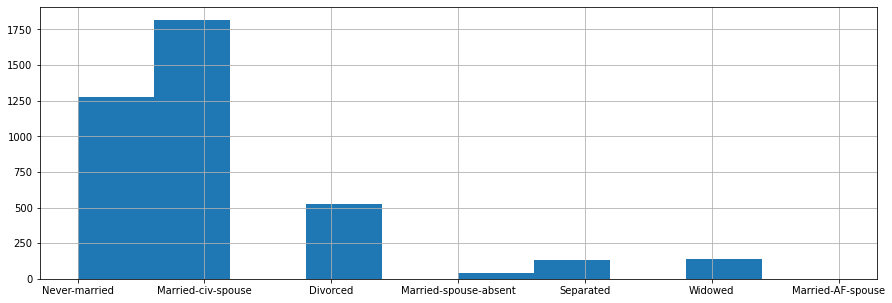

In [60]:
train_data['marital_status'].hist(figsize = (15,5))

Chýbajúce hodnoty teda nahradíme, podobne ako v predchádzajúcom prípade, tou najfrekventovanejšou

In [61]:
imp_marital = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_marital.fit(train_data[['marital_status']])
train_data.loc[:, 'marital_status'] = imp_marital.transform(train_data[['marital_status']])

train_data[train_data['marital_status'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V stĺpci marital_status sa už nenachádzajú žiadne prázdne hodnoty.

### Atribút occupation

In [62]:
train_data[train_data['occupation'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
38,Alan Strope,"783 Randy Square Suite 096\r\nNorth Marilyn, IN 77589",33,Male,1986-01-25,White,Never-married,NaN,0.0,13.0,Not-in-family,0.051941,145.828125,0.0,-0.041406,Bachelors,317761.0,0.0,48.564730,<=50K,United-States,40.0,0.0,NaN,2.365385,19.796906,9.259338,90.480282
48,Albert Jensen,"664 Micheal Haven Apt. 715\r\nSouth Jason, CO 85257",45,Female,1973-12-06,White,Widowed,NaN,0.0,9.0,Not-in-family,0.278985,NaN,0.0,-0.325547,HS-grad,152157.0,0.0,47.771388,<=50K,United-States,20.0,0.0,NaN,1.730769,12.886866,11.592261,172.894915
51,Albert Menefee,"992 Hanson Shore\r\nJamesmouth, OR 19553",52,Male,1966-10-30,White,Married-civ-spouse,NaN,0.0,14.0,Married,2.015417,98.359375,0.0,1.101357,Masters,172652.0,1.0,42.515941,<=50K,United-States,8.0,0.0,NaN,13.989130,48.571370,3.560791,11.610262
55,Alberto Martin,"05899 Brian Circles\r\nEast Lancestad, WI 28280",54,Female,1965-04-23,Black,Widowed,NaN,0.0,10.0,Unmarried,0.030169,140.437500,0.0,0.121573,Some-college,186061.0,0.0,46.453059,<=50K,United-States,40.0,4356.0,NaN,1.512542,13.934354,12.659416,182.183402
66,Alex Stubblefield,"PSC 1476, Box 5156\r\nAPO AE 20184",26,Female,1993-05-06,White,Married-civ-spouse,NaN,0.0,10.0,Married,0.149781,NaN,0.0,-0.121819,Some-college,174163.0,0.0,48.260143,>50K,United-States,40.0,0.0,NaN,2.188963,13.848720,9.789625,127.965886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,William Phillips,"39168 Ward Views Suite 370\r\nPamelaport, TX 79741",49,Male,1969-12-27,White,Married-civ-spouse,NaN,0.0,13.0,Married,0.617168,96.585938,0.0,0.583242,Bachelors,177351.0,0.0,46.868421,>50K,United-States,40.0,2174.0,NaN,4.163043,25.444464,6.723508,47.774505
3868,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,NaN,0.0,9.0,Married,27.058807,35.351562,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,NaN,18.728261,47.500895,3.116141,9.737623
3871,William Reasner,"7845 Gordon Spring\r\nThomasfort, LA 22302",49,Male,1970-08-29,White,Married-civ-spouse,NaN,0.0,13.0,Married,-0.018722,91.187500,0.0,0.778607,Bachelors,208311.0,0.0,58.170916,>50K,United-States,80.0,0.0,NaN,19.733278,50.996589,2.538335,5.381815
3893,William Trudnowski,"4768 Pineda Park\r\nNorth Joshuachester, IL 49799",64,Female,1955-09-23,White,Never-married,NaN,0.0,5.0,Own-child,39.912909,NaN,0.0,6.166521,9th,275778.0,1.0,30.465268,<=50K,Mexico,25.0,0.0,NaN,63.056856,68.151256,0.959817,0.093260


V našom datasete sa nachádza až 210 záznamov s prázdnou hodnotou v stĺpci occupation.

In [63]:
train_data['occupation'].unique()

array(['Other_service', 'Prof_specialty', 'Adm_clerical', 'Craft_repair',
       'Transport_moving', 'Sales', 'Exec_managerial',
       'Handlers_cleaners', 'Machine_op_inspct', 'Tech_support', nan,
       'Farming_fishing', 'Protective_serv', 'Priv_house_serv',
       'Armed_Forces'], dtype=object)

In [64]:
train_data['occupation'].value_counts().idxmax()

'Craft_repair'

In [65]:
train_data['occupation'].value_counts().max()

522

Vidíme, že ani v tomto prípade nie sú hodnoty numerické. Chýbajúcich hodnôt je veľa, najčastejšia hodnota ,,Craft_repair" sa vyskytuje 522-krát, čo nie je až tak veľa. Vytvoríme si novú hodnotu ,,Unknown", ktorou nahradíme chýbajúce hodnoty.

In [66]:
imp_occupation = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
imp_occupation.fit(train_data[['occupation']])
train_data.loc[:, 'occupation'] = imp_occupation.transform(train_data[['occupation']])

train_data[train_data['occupation'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V stĺpci marital_status sa už nenachádzajú žiadne prázdne hodnoty.

### Atribút pregnant

In [67]:
train_data[train_data['pregnant'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1890,John Peno,"54278 Patterson Cliffs Apt. 914\r\nSandersfurt, GA 35863",61,Female,1957-12-16,White,Never-married,Sales,NaN,6.0,Own-child,0.080335,144.351562,0.0,-0.287338,10th,36877.0,0.0,50.928502,<=50K,United-States,10.0,0.0,Private,0.629599,9.457037,20.37333,482.604319


Vidíme, že riadok s prázdnou hodnotou stĺpca "pregnant" je iba jeden. Stĺpec "sex" obsahuje hodnotu Female. Jedná sa teda o ženu 

Pozrieme sa aké rôzne hodnoty tento stĺpec obsahuje.

In [68]:
train_data['pregnant'].unique()

array([ 0.,  1., nan])

Vidíme, že v tomto stĺpci sa okrem prázdnych hodnôt nachádzajú len 0 a 1. Keby zaznam, v ktorom hodnota chýba patril mužovi, hneď by sme identifikovali, že treba doplniť hodnotu "0". V našom prípade sa ale jedná o ženu. Teraz sa pozrieme, či máme viac žien tehotných alebo nie tehotných.

<AxesSubplot:>

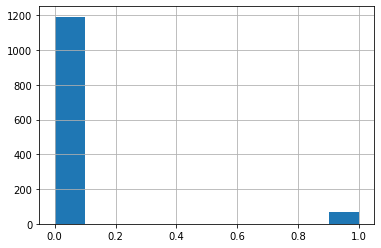

In [69]:
train_data.loc[(train_data['sex'] == 'Female'), 'pregnant'].hist()

Vidíme, že veľká väčšina žien nie je tehotných, a preto môžeme aj do chýbajúcich záznamov doplniť takúto hodnotu.

In [70]:
imp_pregnant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imp_pregnant.fit(train_data[['pregnant']])
train_data.loc[:, 'pregnant'] = imp_pregnant.transform(train_data[['pregnant']])

In [71]:
train_data[train_data['pregnant'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


V datasete už nemáme záznamy, v ktorých by chýbali pregnant hodnoty.

### Artibúty Education_num a Education

Pozrieme si aké jedinečné hodnoty sa nachádzajú v stĺpci education_num.

In [72]:
train_data['education_num'].unique()

array([10.,  9.,  8.,  5., 14., 13.,  7.,  3.,  6., 11., 12., 15.,  4.,
       16.,  2.,  1., nan])

In [73]:
len(train_data['education_num'].unique())

17

V datasete sa nachádza ešte stĺpec education. Poďme sa pozrieť na jeho unikátne hodnoty.

In [74]:
train_data['education'].unique()

array(['Some-college', 'HS-grad', '12th', '9th', 'Masters', 'Bachelors',
       '11th', '5th-6th', '10th', 'Assoc-voc', 'Assoc-acdm',
       'Prof-school', '7th-8th', 'Doctorate', '1st-4th', 'Preschool', nan],
      dtype=object)

In [75]:
len(train_data['education'].unique())

17

Vidíme, že počet jedinečných hodnôt je v obodvoch stĺpcoch rovnaký. Zrejme medzi týmito dvomi atribútmi existuje nejaka súvislosť. Myslíme si, že atribút education_num je iba numerická reprezentácia kategorických hodnôt stĺpca education. Poďme si to overiť. 

In [76]:
for education_num in train_data.education_num.unique():
    print(train_data[train_data.education_num == education_num].education.unique())

['Some-college']
['HS-grad' nan]
['12th']
['9th']
['Masters']
['Bachelors']
['11th']
['5th-6th']
['10th']
['Assoc-voc']
['Assoc-acdm']
['Prof-school']
['7th-8th']
['Doctorate']
['1st-4th']
['Preschool']
[]


Pre každú hodnotu education_num sme si vypísali jedinečné hodnoty education, ktoré sa v datasete spolu s ňou vyskytujú. Ako môžeme vidieť pre každú hodnotu education_num zodpovedá práve jedna hodnota atribútu education. Stĺpec education teda dstránime ale najskôr ho použijeme na nahradenie chýbajúcich hodnôt v stĺpci education_num.

In [77]:
train_data[train_data['education_num'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2929,Raymond Diaz,"4973 Price Forge\r\nNorth Emmashire, CT 65182",38,Female,1981-07-07,White,Separated,Sales,0.0,NaN,Unmarried,NaN,121.257812,0.0,0.010873,10th,405177.0,0.0,53.571396,<=50K,United-States,40.0,0.0,Private,2.040134,12.948253,11.198396,167.728186


In [78]:
train_data[train_data['education'] == '10th'].education_num.unique()

array([ 6., nan])

Vidíme, že aj táto hodnota chýba len v 1 zázname.

Napíšeme si vlastný imputer. Prázdne hodnoty v education_num bude nahrádzať podľa hodnoty v stĺpci education. Ak by sa aj v tomto stĺpci nachádzala prázdna hodnota, na nahradenie použijeme modus.

In [79]:
class EducationImputer(TransformerMixin):
    def __init__(self):
        self.mode = 0
    
    def create_dict(self, X):
        edu_dict = {}
        for education_num in X.education_num.unique():
            if pd.isnull(education_num):
                continue
                
            education = X[X.education_num == education_num].education.unique()[0]
            edu_dict[education] = education_num
            
        return edu_dict
        
    def _get_mask(self, X):
        return np.isnan(X.education_num)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.mode =  X[~mask].education_num.mode()
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        edu_dict = self.create_dict(X)
        
        X.loc[mask, 'education_num'] = X[mask].education.apply(lambda x : edu_dict[x] if not pd.isnull(x) else self.mode)

        return X


In [80]:
imp_edu = EducationImputer()
imp_edu.fit(train_data)
train_data = imp_edu.transform(train_data)

In [81]:
train_data[train_data['education'] == '10th'].education_num.unique()

array([6.])

Namiesto prázdnej hodnoty sa doplnila správna hodnota podľa stĺpca education.

In [82]:
train_data[train_data['education_num'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Nahradenie pomocou nášho imputera sa podarilo.

### Atribút income

In [83]:
train_data[train_data['income'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1231,George Smith,"69758 Barnett Canyon Apt. 635\r\nVirginialand, DE 16403",59,Male,1960-04-07,White,Married-civ-spouse,Craft_repair,0.0,13.0,Married,1.634902,88.546875,0.0,0.940484,Bachelors,210991.0,1.0,44.682361,NaN,United-States,40.0,1740.0,Local-gov,13.641304,44.57924,3.408574,10.783359


Aj táto hodnota chýba iba v jednom zázname.

In [84]:
train_data['income'].unique()

array(['<=50K', '>50K', nan], dtype=object)

Vidíme, že ostatné záznamy obsahujú len dve rôzne hodnoty tohto atribútu (<=50K a >50K).

Zistíme, ktorá z týchto dvoch hodnôt sa vyskytuje častejšie. 

In [85]:
train_data['income'].value_counts().idxmax()

'<=50K'

In [86]:
train_data['income'].value_counts().max()

3007

In [87]:
train_data['income'].count()

3932

Vidíme, že viac ako tri štvrtiny záznamov obsahuje hodnotu <=50K. Chýbajúcu hodnotu teda nehradíme touto.

In [88]:
imp_income = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_income.fit(train_data[['income']])
train_data.loc[:, 'income'] = imp_income.transform(train_data[['income']])

In [89]:
train_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [90]:
train_data[train_data['income'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Doplnili sme chýbajúcu hodnotu.

### Atribút native_country

In [91]:
train_data[train_data['native_country'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
18,Adam Chipman,"15596 Linda Pine\r\nLake Kayla, MI 50632",73,Female,1946-09-27,Black,Separated,Craft_repair,0.0,6.0,Unmarried,55.405757,11.882812,0.0,7.347117,10th,39223.0,1.0,28.277260,<=50K,NaN,40.0,0.0,Private,92.307692,67.402008,0.536685,-0.245253
112,Andre Mcdonald,"448 Miller Ports\r\nLake Samuel, FL 25888",45,Male,1973-12-16,Asian-Pac-Islander,Never-married,Transport_moving,0.0,9.0,Other-relative,-0.024402,NaN,0.0,-0.194928,HS-grad,163392.0,0.0,45.973317,<=50K,NaN,40.0,0.0,Private,15.123746,42.678875,2.850335,7.485031
196,Arthur Stallcup,"9384 Margaret Springs Apt. 915\r\nTammyfurt, ND 44467",53,Male,1966-05-16,White,Divorced,Other_service,0.0,13.0,Not-in-family,-0.282325,NaN,0.0,-0.125018,Bachelors,182655.0,0.0,49.459826,>50K,NaN,45.0,0.0,Private,3.158027,17.606036,7.390657,67.415886
298,Brent Leffert,"38668 Roth Burg\r\nEast Daniellemouth, ID 19600",41,Male,1978-04-22,White,Married-civ-spouse,Sales,0.0,13.0,Married,2.079829,81.539062,0.0,0.860457,Bachelors,311184.0,0.0,38.689045,<=50K,NaN,20.0,0.0,Private,2.158027,19.927568,10.076770,104.745161
454,Charles Hicks,"51805 Huerta Hills Suite 640\r\nWest Matthew, NE 80274",34,Male,1985-04-30,White,Married-civ-spouse,Exec_managerial,0.0,13.0,Married,-0.639522,113.132812,0.0,0.097123,Bachelors,165695.0,0.0,56.996213,>50K,NaN,40.0,0.0,Private,5.027592,25.016451,6.142165,41.664378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Thomas Sobus,"17715 Marquez Mill Apt. 430\r\nBakerfurt, NH 08471",86,Male,1932-12-10,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Married,13.629142,52.109375,0.0,3.179048,Bachelors,239303.0,1.0,38.677803,<=50K,NaN,50.0,0.0,Private,4.081104,25.045129,7.126208,54.323798
3590,Tim Evans,"735 Danielle Loop\r\nPort Michael, RI 91892",56,Female,1963-07-23,Black,Never-married,Priv_house_serv,0.0,9.0,Unmarried,-0.145024,130.257812,0.0,0.101426,HS-grad,189674.0,0.0,49.040361,<=50K,NaN,28.0,0.0,Private,1.810201,14.178683,11.139956,150.876131
3672,Travis Gordon,"283 Erin Shoal Suite 767\r\nRodneymouth, PA 85306",62,Female,1957-04-09,White,Divorced,Tech_support,0.0,13.0,Not-in-family,-0.356742,NaN,0.0,-0.080479,Bachelors,163322.0,0.0,50.254681,<=50K,NaN,30.0,0.0,Private,3.224916,23.002445,7.610711,59.568055
3702,Vern Kneser,"88274 Tucker Lights Suite 668\r\nRobinport, OH 40550",60,Male,1959-10-24,White,Married-civ-spouse,Prof_specialty,0.0,14.0,Married,0.104573,122.351562,0.0,0.195328,Masters,325538.0,0.0,4475.411815,>50K,NaN,40.0,0.0,Federal-gov,3.342809,17.729561,7.020929,61.914650


Chýbajúca hodnota sa nachádza v 65 záznamoch.

In [92]:
train_data['native_country'].unique()

array(['United-States', 'Columbia', 'El-Salvador', nan, 'Mexico',
       'Scotland', 'Puerto-Rico', 'China', 'Cuba', 'Germany', 'Thailand',
       'Italy', 'Trinadad&Tobago', 'Guatemala', 'Philippines',
       'Nicaragua', 'France', 'Jamaica', 'Vietnam', 'Taiwan', 'Poland',
       'India', 'South', 'Ecuador', 'England', 'Canada', 'Honduras',
       'Iran', 'Dominican-Republic', 'Portugal', 'Hungary', 'Greece',
       'Peru', 'Cambodia', 'Haiti', 'Hong', 'Ireland', 'Japan',
       'Yugoslavia'], dtype=object)

V tomto stĺpci sa nachádza pomerne veľa hodnôt. Vyskúšame vytvoriť novú hodnotu ,,Unknown", ktorou budeme nahrádzať prázdne hodnoty.

In [93]:
imp_native_country = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
imp_native_country.fit(train_data[['native_country']])
train_data.loc[:, 'native_country'] = imp_native_country.transform(train_data[['native_country']])

In [94]:
train_data[train_data['native_country'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


In [95]:
train_data['native_country'].unique()

array(['United-States', 'Columbia', 'El-Salvador', 'Unknown', 'Mexico',
       'Scotland', 'Puerto-Rico', 'China', 'Cuba', 'Germany', 'Thailand',
       'Italy', 'Trinadad&Tobago', 'Guatemala', 'Philippines',
       'Nicaragua', 'France', 'Jamaica', 'Vietnam', 'Taiwan', 'Poland',
       'India', 'South', 'Ecuador', 'England', 'Canada', 'Honduras',
       'Iran', 'Dominican-Republic', 'Portugal', 'Hungary', 'Greece',
       'Peru', 'Cambodia', 'Haiti', 'Hong', 'Ireland', 'Japan',
       'Yugoslavia'], dtype=object)

Vidíme, že nám naozaj pribudla nová hodnota.

### Atribút hours_per_week

In [96]:
train_data[train_data['hours_per_week'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1310,Gregory Wagnon,"73728 Leon Walks\r\nDunnshire, SC 91590",52,Male,1967-03-10,White,Divorced,Handlers_cleaners,0.0,10.0,Own-child,6.119066,66.875,0.0,1.878734,Some-college,245053.0,1.0,42.182639,<=50K,United-States,NaN,1504.0,Private,3.695652,25.496003,7.2966,53.945293


In [97]:
train_data['hours_per_week'].unique()

array([40., 35., 16., 25., 60., 55., 30., 50., 46., 42.,  2., 99., 64.,
       70., 59., 45., 20., 48.,  8., 52., 44., 65., 37., 14., 15., 43.,
       38., 68., 12., 17., 72., 23., 61., 18., 24., 75., 41., 10.,  6.,
       32., 51., 58., 36., 39., 56.,  5.,  4.,  3., 33., 27.,  9.,  7.,
       80., 47., 90., 84., 85.,  1., 54., 28., 66., 22., 19., 73., nan,
       53., 49., 77., 21., 34., 29., 63., 62., 13., 76., 11., 31., 26.,
       81., 57., 91.])

Doplniť treba iba hodnotu len v jednom zázname. Chýnajúcu hodnotu skúsime nahradiť mediánom.

In [98]:
train_data['hours_per_week'].median()

40.0

Medián tohto stĺpca je hodnota 40.

In [99]:
imp_hours_per_week = SimpleImputer(missing_values=np.nan, strategy='median')
imp_hours_per_week.fit(train_data[['hours_per_week']])
train_data.loc[:, 'hours_per_week'] = imp_hours_per_week.transform(train_data[['hours_per_week']])

In [100]:
train_data[train_data['hours_per_week'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Chýbajúca hodnota bola doplnená.

### Atribút capital_loss

In [101]:
train_data[train_data['capital_loss'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
1908,John Ruffin,"03602 Daniels Villages Suite 661\r\nRayland, MO 34511",56,Male,1963-02-01,White,Never-married,Handlers_cleaners,0.0,9.0,Other-relative,-0.282879,126.835938,0.0,-0.148753,HS-grad,81528.0,0.0,51.715384,<=50K,United-States,60.0,NaN,Private,4.728261,26.269072,6.965948,51.384494
2524,Melvin Ferullo,"09184 Taylor Garden Suite 918\r\nEast Michael, MO 73434",70,Male,1949-04-15,White,Married-civ-spouse,Craft_repair,0.0,6.0,Married,0.348210,NaN,5013.0,0.299127,10th,40641.0,0.0,45.600496,<=50K,United-States,40.0,NaN,Local-gov,6.464047,27.964673,5.023047,27.075541


In [102]:
train_data['capital_loss'].unique()

array([   0., 1902., 4356., 1590., 1887., 2001., 1848.,  880., 1977.,
       3770., 1564., 1408., 1602., 1980., 1485., 1974., 2392., 1573.,
       2002., 2559., 1672., 1740.,  625., 1504., 2547., 2415., 2258.,
       2444., 1876., 2339., 2149., 1594., 2603., 1669.,   nan, 1825.,
       2231., 1721., 1762., 2206., 1719., 1816., 2051., 1651., 1741.,
       2174., 2042., 1411., 1735., 2824.,  810., 1258., 1617., 1579.])

In [103]:
train_data['capital_loss'].value_counts().idxmax()

0.0

In [104]:
train_data['capital_loss'].value_counts().max()

3747

In [105]:
train_data['capital_loss'].count()

3931

Vidíme, že najčastejšia hodnota je 0. Až 95% záznamov obsahuje hodnotu "0" v stĺpci capital_loss. Preto  nulu doplníme aj namiesto chýnajúcich hodnôt.

In [106]:
imp_capital_loss = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_capital_loss.fit(train_data[['capital_loss']])
train_data.loc[:, 'capital_loss'] = imp_capital_loss.transform(train_data[['capital_loss']])

In [107]:
train_data['capital_loss'].value_counts().max()

3749

Počet záznamov s hodnotou 0 v atribúte capital_loss stúpol o 2 - správne sme doplnili chýbajúce hodnoty.

### Atribút capital_gain

Pozrieme si jedinečné hodnoty tohto atribútu.

In [108]:
train_data['capital_gain'].unique()

array([    0.,  3674.,  5178., 15024.,  3781.,  3464.,  3887.,  7688.,
        3273.,  5013., 13550.,  3818.,  4508., 14344.,   594.,  8614.,
        4064.,  3325.,  2414.,   114., 20051.,  1409.,  2597., 14084.,
        4386.,  4101., 25236.,  3103.,  6767.,  7298.,  9386.,  2635.,
         401., 27828., 99999.,  3471., 10605.,  2176.,  2407.,  1471.,
        4865.,  2885.,  4650.,  2580.,  2936.,  2977.,  3908.,  6418.,
        1797., 34095.,  6497.,  7443.,  5721.,  3411.,  3942.,  2062.,
        3137.,  4787.,  2964.,  2105.,  2354.,  2829., 18481.,  2174.,
        6360.,  4416.,  2463.,  2009.,  2329., 10520.,  1424., 15831.,
        1055.,  6849., 11678.,  4934.,  5455.,  4687.,  1831.,  1848.,
        6514.])

Capital_gain je síce numerický atribút avšak nachádza sa v ňom pomerne málo unikátych hodnôt. Pozrime si najčastejšie vyskytujúcu sa hodnotu a jej početnosť.

In [109]:
train_data['capital_gain'].value_counts().idxmax()

0.0

In [110]:
train_data['capital_gain'].value_counts().max()

3598

Vidíme, že skoro všetky hodnoty majú hodnotu 0. Prázdne hodnoty teda nahradíme touto hodnotou.

### Atribút workclass

In [111]:
train_data[train_data['workclass'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
38,Alan Strope,"783 Randy Square Suite 096\r\nNorth Marilyn, IN 77589",33,Male,1986-01-25,White,Never-married,Unknown,0.0,13.0,Not-in-family,0.051941,145.828125,0.0,-0.041406,Bachelors,317761.0,0.0,48.564730,<=50K,United-States,40.0,0.0,NaN,2.365385,19.796906,9.259338,90.480282
48,Albert Jensen,"664 Micheal Haven Apt. 715\r\nSouth Jason, CO 85257",45,Female,1973-12-06,White,Widowed,Unknown,0.0,9.0,Not-in-family,0.278985,NaN,0.0,-0.325547,HS-grad,152157.0,0.0,47.771388,<=50K,United-States,20.0,0.0,NaN,1.730769,12.886866,11.592261,172.894915
51,Albert Menefee,"992 Hanson Shore\r\nJamesmouth, OR 19553",52,Male,1966-10-30,White,Married-civ-spouse,Unknown,0.0,14.0,Married,2.015417,98.359375,0.0,1.101357,Masters,172652.0,1.0,42.515941,<=50K,United-States,8.0,0.0,NaN,13.989130,48.571370,3.560791,11.610262
55,Alberto Martin,"05899 Brian Circles\r\nEast Lancestad, WI 28280",54,Female,1965-04-23,Black,Widowed,Unknown,0.0,10.0,Unmarried,0.030169,140.437500,0.0,0.121573,Some-college,186061.0,0.0,46.453059,<=50K,United-States,40.0,4356.0,NaN,1.512542,13.934354,12.659416,182.183402
66,Alex Stubblefield,"PSC 1476, Box 5156\r\nAPO AE 20184",26,Female,1993-05-06,White,Married-civ-spouse,Unknown,0.0,10.0,Married,0.149781,NaN,0.0,-0.121819,Some-college,174163.0,0.0,48.260143,>50K,United-States,40.0,0.0,NaN,2.188963,13.848720,9.789625,127.965886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,William Phillips,"39168 Ward Views Suite 370\r\nPamelaport, TX 79741",49,Male,1969-12-27,White,Married-civ-spouse,Unknown,0.0,13.0,Married,0.617168,96.585938,0.0,0.583242,Bachelors,177351.0,0.0,46.868421,>50K,United-States,40.0,2174.0,NaN,4.163043,25.444464,6.723508,47.774505
3868,William Pope,"68430 Erik Terrace Suite 279\r\nPort Adamborough, WV 73101",58,Male,1961-07-28,White,Married-civ-spouse,Unknown,0.0,9.0,Married,27.058807,35.351562,0.0,4.819742,HS-grad,106648.0,1.0,31.464412,<=50K,United-States,25.0,0.0,NaN,18.728261,47.500895,3.116141,9.737623
3871,William Reasner,"7845 Gordon Spring\r\nThomasfort, LA 22302",49,Male,1970-08-29,White,Married-civ-spouse,Unknown,0.0,13.0,Married,-0.018722,91.187500,0.0,0.778607,Bachelors,208311.0,0.0,58.170916,>50K,United-States,80.0,0.0,NaN,19.733278,50.996589,2.538335,5.381815
3893,William Trudnowski,"4768 Pineda Park\r\nNorth Joshuachester, IL 49799",64,Female,1955-09-23,White,Never-married,Unknown,0.0,5.0,Own-child,39.912909,NaN,0.0,6.166521,9th,275778.0,1.0,30.465268,<=50K,Mexico,25.0,0.0,NaN,63.056856,68.151256,0.959817,0.093260


In [112]:
train_data['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc',
       'State-gov', nan, 'Federal-gov', 'Without-pay'], dtype=object)

In [113]:
train_data['workclass'].value_counts().idxmax()

'Private'

In [114]:
train_data['workclass'].value_counts().max()

2770

In [115]:
train_data['workclass'].count()

3724

Chýbajúce hodnoty sa nachádzajú až v 209 záznamoch. Najčastejšie vyskytujúca hodnota ,,Private" sa vyskytuje až 2770-krát. Chýbajúce hodnoty nahradíme teda modusom.

In [116]:
imp_capital_loss = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_capital_loss.fit(train_data[['workclass']])
train_data.loc[:, 'workclass'] = imp_capital_loss.transform(train_data[['workclass']])

### Artibút age

V stĺpci age sa v trénovacej množine dát nenachádzajú prázdne hodnoty avšak v testovacej sade sa môžu vyskytnúť záznamy bez uvedeného veku. Preto sme si pre istotu vytvorili vlastný AgeImputer, ktorý vypočíta vek podľa dátumu narodenia. Ak by sa náhodou nachádzala prázdna hodnota aj v stĺpci date_of_birth, doplníme namiesto prázdnej hodnoty medián.

In [117]:
from sklearn.base import TransformerMixin

class AgeImputer(TransformerMixin):
    def __init__(self):
        self.base_year = 2019
        self.median = 0
    
    def _get_mask(self, X):
        return np.isnan(X.age)        
    
    def fit(self, X):
        mask = self._get_mask(X)
        self.median = np.median(X[~mask].age)
    
        return self
    
    def transform(self, X):
        mask = self._get_mask(X)
        X.loc[mask, 'age'] = X[mask].date_of_birth.apply(lambda x : (self.base_year - x.year) if not pd.isnull(x) else self.median)
        X = X.astype({'age': 'int64'})
        
        return X
        

### ,,Glucose" atribúty

In [118]:
train_data.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                  0
marital_status        0
occupation            0
pregnant              0
education_num         0
relationship          0
skewness_glucose      1
mean_glucose        737
capital_gain          0
kurtosis_glucose      0
education             1
fnlwgt                0
diabetes              0
std_glucose           0
income                0
native_country        0
hours_per_week        0
capital_loss          0
workclass             0
mean_oxygen           0
std_oxygen            0
kurtosis_oxygen       0
skewness_oxygen       0
dtype: int64

Teraz chceme preskúmať, aká stratégia dopĺňania by bola najlepšia pre ,,glucose" atribúty. Myslíme si, aj na základe prieskumnej analýzy, že tieto atribúty, budú mať veľkú dôležitosť pri predikovaní cieľovej premennej. Preto teda chceme hodnoty týchto atribútov nahrádzať sofistikovanejším spôsobom.

Pozrime si korelačnú mapu týchto atribútov

<AxesSubplot:>

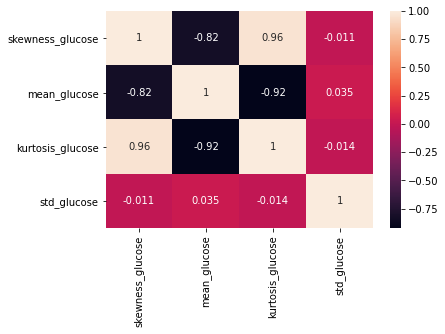

In [119]:
sns.heatmap(train_data.loc[:, ['skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose']].corr(), annot=True)

Vidíme, že mean_glucose má pomerne silnú koreláciu so skewness_glucose a s kurtosis_glucose. Kurtosis_glucose má zasa silnú koreláciu so skewness_glucose.

### Artibúty skewness_glucose a kurtosis_glucose

In [120]:
train_data[train_data['skewness_glucose'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2929,Raymond Diaz,"4973 Price Forge\r\nNorth Emmashire, CT 65182",38,Female,1981-07-07,White,Separated,Sales,0.0,6.0,Unmarried,NaN,121.257812,0.0,0.010873,10th,405177.0,0.0,53.571396,<=50K,United-States,40.0,0.0,Private,2.040134,12.948253,11.198396,167.728186


Prázdna hodnota tohto atribútu je len v jednom zázname.

In [121]:
class SkewnessGlucoseImputer(TransformerMixin):
    def __init__(self):
        self.model = LinearRegression()
        self.parameters = ['kurtosis_glucose']
        
    def _get_mask(self, _X):
        return np.isnan(_X.skewness_glucose)        
    
    def fit(self, _X):
        mask = self._get_mask(_X)
        self.model.fit(X = _X.loc[~mask, self.parameters], y = _X[~mask].skewness_glucose)
    
        return self
    
    def transform(self, _X):
        mask = self._get_mask(_X)
        
        if not _X[mask].empty:
            _X.loc[mask, 'skewness_glucose'] = self.model.predict(_X.loc[mask, self.parameters])

        return _X

In [122]:
imp_skewness_glu = SkewnessGlucoseImputer()
train_data = imp_skewness_glu.fit_transform(train_data)

Meno pacienta, ktorému chýbal záznam o tomto atribúte bol Raymond Diaz. Pozrieme si teda jeho záznam po priradení hodnoty.

In [123]:
train_data_copy[train_data_copy['name'] == 'Raymond Diaz']

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
2929,Raymond Diaz,"4973 Price Forge\r\nNorth Emmashire, CT 65182",38,Female,1981-07-07,White,Separated,Sales,0.0,NaN,Unmarried,NaN,121.257812,0.0,0.010873,10th,405177.0,0.0,53.571396,<=50K,United-States,40.0,0.0,Private,2.040134,12.948253,11.198396,167.728186


Vidíme, že v zázname sa teraz nachádza v stĺpci skewness_glucose hodnota -1.217227. Na základe pozorovania hodnôt, si myslíme, že daná hodnota ,,sedí", vzhľadom na koreláciu, ktorú má skewness_glucose s kurtosis_glucose. 

### Atribúty mean_glucose a kurtosis_glucose

Pozrieme si záznamy s chýbajúcimi hodnotami atribútu mean_glucose.

In [124]:
train_data[train_data['mean_glucose'].isnull()]

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
15,Adam Baskerville,USS Donovan\r\nFPO AA 95439,47,Male,1972-01-27,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Married,0.373241,NaN,0.0,0.282605,Bachelors,746786.0,0.0,46.188377,>50K,United-States,55.0,0.0,Private,4.346990,26.750629,6.749735,47.030641
16,Adam Baugh,"285 Rodney Center Suite 670\r\nGregorystad, NH 19299",52,Male,1967-10-21,White,Married-civ-spouse,Craft_repair,0.0,3.0,Married,-0.532189,NaN,0.0,-0.142202,5th-6th,229744.0,0.0,60.302104,<=50K,El-Salvador,40.0,0.0,Private,0.943144,11.896155,16.109450,291.899226
20,Adam Duncan,"99550 Abigail View Suite 214\r\nSouth Angelafort, WY 56498",55,Male,1964-04-02,Black,Never-married,Adm_clerical,0.0,9.0,Other-relative,0.228760,NaN,0.0,0.412132,HS-grad,429346.0,0.0,46.941811,<=50K,United-States,40.0,0.0,Private,3.755017,23.746206,7.368571,58.281302
22,Adam Kowal,"0135 Robert Burg Suite 124\r\nNew Rebecca, CO 39994",68,Female,1951-04-22,White,Married-civ-spouse,Prof_specialty,0.0,13.0,Married,20.160368,NaN,0.0,3.491773,Bachelors,93886.0,1.0,29.931774,>50K,United-States,46.0,0.0,Local-gov,17.255853,50.153858,3.264343,9.945490
23,Adam Perry,"02726 Hale Lane\r\nLynchmouth, HI 33466",69,Female,1950-09-17,White,Married-civ-spouse,Other_service,0.0,10.0,Married,28.391438,NaN,0.0,5.109232,Some-college,182217.0,1.0,33.947512,<=50K,Scotland,40.0,0.0,Private,76.301003,74.624173,0.769947,-0.412584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,William Womack,"476 Alyssa Plains Suite 480\r\nLake Keithstad, LA 59849",54,Male,1965-07-06,White,Never-married,Handlers_cleaners,0.0,8.0,Own-child,0.091127,NaN,0.0,0.147629,12th,423024.0,0.0,47.331875,<=50K,United-States,20.0,0.0,Private,1.949833,14.716581,10.834946,142.691508
3919,Winford Shinabery,"8439 Rebecca Lane Apt. 283\r\nPort Xavier, SD 44901",55,Male,1964-01-06,White,Married-civ-spouse,Exec_managerial,0.0,13.0,Married,1.104581,NaN,0.0,0.701465,Bachelors,36177.0,0.0,-4541.616845,>50K,United-States,45.0,0.0,State-gov,3.501672,22.125988,7.005293,51.906160
3922,Winston Johnson,"5094 Jason Turnpike Suite 436\r\nChristopherside, MT 97570",60,Male,1959-06-01,Black,Married-civ-spouse,Unknown,0.0,13.0,Married,-0.413872,NaN,0.0,-0.138971,Bachelors,230165.0,0.0,52.997420,<=50K,United-States,40.0,0.0,Private,2.725753,15.478220,8.590834,95.443520
3923,Wm Caravello,"1807 Lopez Summit\r\nPort Heatherchester, KY 69206",60,Female,1958-12-08,Amer-Indian-Eskimo,Never-married,Exec_managerial,0.0,9.0,Own-child,0.154630,NaN,0.0,0.472583,HS-grad,67187.0,0.0,47.423205,<=50K,United-States,40.0,0.0,Local-gov,3.625418,20.264930,6.802879,52.765621


Vidíme, že záznamov je až 737.

Keďže, sme si vyššie v korelačnej mape všimli, že atribúty skewness_glucose, mean_glucose, kurtosis_glucose majú pomerne silnú koreláciu, na doplnenie chýbajúcich hodnôt použijeme KNN.

In [125]:
imputer = KNNImputer(n_neighbors=20)
train_data.loc[:, ['skewness_glucose', 'mean_glucose', 'kurtosis_glucose']] = imputer.fit_transform(train_data.loc[:, ['skewness_glucose', 'mean_glucose', 'kurtosis_glucose']])

In [126]:
df_glu = train_data.loc[:, ['skewness_glucose', 'mean_glucose', 'kurtosis_glucose']]
df_glu.isnull().sum()

skewness_glucose    0
mean_glucose        0
kurtosis_glucose    0
dtype: int64

Vidíme, že v stĺpci mean_glucose sa už nevyskytujú prázdne hodnoty.

### Atribút std_glucose

Atribút std_glucose nekoreluje výrazne so žiadným z ostatných ,,glucose" atribútov. Na nahradenie prázdnych hodnôt by sme použili priemer.

### ,,Oxygen" atribúty

Teraz ideme navrhnút stratégie nahrádzania prázdnych hodnôt pre ,,oxygen" atribúty.

<AxesSubplot:>

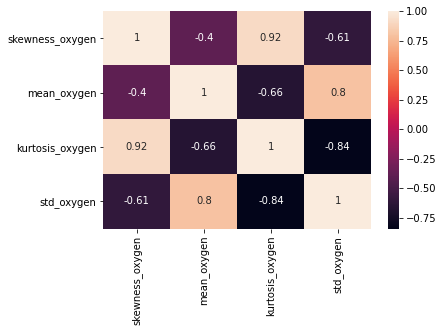

In [127]:
sns.heatmap(train_data.loc[:, ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].corr(), annot=True)

Vidíme, že korelácie medzi atribútmi sú rôzne, avšak celkovo sú silnejšie v porovnaní s koreláciami ,,glucose" atribútov. Najslabšia korelácia je -0.4. Na doplnenie prázdnych hodnôt ,,oxygen" atribútov použijeme KNN.

In [128]:
train_data.loc[:, ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']]

,skewness_oxygen,mean_oxygen,kurtosis_oxygen,std_oxygen
0,-0.478376,66.311873,0.870147,77.549955
1,-0.426168,61.021739,0.978639,80.095947
2,51.551196,4.731605,6.964347,27.308666
3,129.896678,2.136288,9.966755,13.809526
4,18.186698,9.207358,4.360677,38.488071
...,...,...,...,...
3928,125.782096,1.753344,11.034005,18.236376
3929,-0.819638,107.212375,0.115883,74.621195
3930,-0.853061,129.272575,-0.407510,78.381715
3931,103.876871,2.276756,9.120845,14.977893


In [129]:
imputer = KNNImputer(n_neighbors=20)
train_data.loc[:, ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']] = imputer.fit_transform(train_data.loc[:, ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']])

In [130]:
train_data.loc[:, ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']]

,skewness_oxygen,mean_oxygen,kurtosis_oxygen,std_oxygen
0,-0.478376,66.311873,0.870147,77.549955
1,-0.426168,61.021739,0.978639,80.095947
2,51.551196,4.731605,6.964347,27.308666
3,129.896678,2.136288,9.966755,13.809526
4,18.186698,9.207358,4.360677,38.488071
...,...,...,...,...
3928,125.782096,1.753344,11.034005,18.236376
3929,-0.819638,107.212375,0.115883,74.621195
3930,-0.853061,129.272575,-0.407510,78.381715
3931,103.876871,2.276756,9.120845,14.977893


### Atribút fnlwgt

Ide o numerický atribút, ktorý nekoreluje so žiadnym iným atribútom. Trénovacia sada neobsahuje prázdne hodnoty tohto atribútu, avšak ak by sa vyskytli v testovacej, nahradili by sme ich priemerom.

### Overenie

In [131]:
train_data.isnull().sum()

name                0
address             0
age                 0
sex                 0
date_of_birth       0
race                0
marital_status      0
occupation          0
pregnant            0
education_num       0
relationship        0
skewness_glucose    0
mean_glucose        0
capital_gain        0
kurtosis_glucose    0
education           1
fnlwgt              0
diabetes            0
std_glucose         0
income              0
native_country      0
hours_per_week      0
capital_loss        0
workclass           0
mean_oxygen         0
std_oxygen          0
kurtosis_oxygen     0
skewness_oxygen     0
dtype: int64

## Imputer-y

Keďže nemáme jednotnú stratégiu pre nahrádzanie prázdnych hodnôt urobili sme si vlastné imputer-y, ktoré iba obaľujú imputer-y z knižnice sklearn. Zmysel týchto našich imputer-ov je v tom, že narozdiel od knižničných vracajú dataframe aj s názvami stĺpcov a teda budeme vedieť podľa potreby v ďalších krokoch pipeline pristupovať k jednotlivým atribútom cez ich názov.

In [132]:
class CustomSimpleImputer(TransformerMixin):
    
    def __init__(self, columns, strategy='mean', fill_value=None):
        self.imputer = SimpleImputer(missing_values=np.nan ,strategy=strategy, fill_value=fill_value)
        self.columns = columns
        
    def fit(self, X):
        self.imputer.fit(X.loc[:, self.columns])
        
        return self
        
    def transform(self, X):
        X.loc[:, self.columns] = self.imputer.transform(X.loc[:, self.columns])
        
        return X

In [133]:
class CustomKNNImputer(TransformerMixin):
    
    def __init__(self, columns, n_neighbors=5):
        self.imputer = KNNImputer(missing_values=np.nan, n_neighbors=n_neighbors)
        self.columns = columns
        
    def fit(self, X):
        self.imputer.fit(X.loc[:, self.columns])
        
        return self
        
    def transform(self, X):
        X.loc[:, self.columns] = self.imputer.transform(X.loc[:, self.columns])
        
        return X

## Pipeline

Vytvoríme pipeline, a dáme do nej triedy na nahradzovanie prázdnych hodnôt.

In [134]:
# atributy, rozdelene podla toho aku metodu pouzivame na nahradzovanie prazdnych hodnot
knn_glu_columns = ['mean_glucose', 'kurtosis_glucose', 'skewness_glucose']
knn_ox_columns = ['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']
columns_most_frequent = ['relationship', 'race', 'marital_status', 'income', 'capital_gain', 'capital_loss', 'workclass']
columns_mean = ['fnlwgt', 'std_glucose']
columns_median = ['hours_per_week']
columns_constant_unknown = ['occupation', 'native_country']
columns_constant_0 = ['pregnant']

impute_pipeline = Pipeline(steps=[
    ('sex_impute', SexImputer()),
    ('edu_impute', EducationImputer()),
    ('age_impute', AgeImputer()),
    ('skewness_glu_impute', SkewnessGlucoseImputer()),
    ('most_frequent_impute', CustomSimpleImputer(columns_most_frequent, strategy='most_frequent')),
    ('mean_impute', CustomSimpleImputer(columns_mean, strategy='mean')),
    ('median_impute', CustomSimpleImputer(columns_median, strategy='median')),
    ('constant_unknown_impute', CustomSimpleImputer(columns_constant_unknown, strategy='constant', fill_value = 'Unknown')),
    ('constant_0_impute', CustomSimpleImputer(columns_constant_0, strategy='constant', fill_value = 0)),
    ('knn_glu', CustomKNNImputer(knn_glu_columns, n_neighbors=20)),
    ('knn_ox', CustomKNNImputer(knn_ox_columns, n_neighbors=20))
])

Keďže sa teraz jedná o trénovaciu množinu dát, zavoláme metódy fit aj transform. Keďže sa transformácia trénujete iba na trénovacích dátach, na množine testovacích dát už budeme volať len funkciu transform. 

In [135]:
train_data_copy = impute_pipeline.fit_transform(train_data_copy)

train_data_copy

,name,address,age,sex,date_of_birth,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,education,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Aaron Davis,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",62,Male,1956-11-02,White,Never-married,Other_service,0.0,10.0,Own-child,1.282292,80.523438,0.0,1.390950,Some-college,141323.0,1.0,54.076185,<=50K,United-States,40.0,0.0,Private,66.311873,77.549955,0.870147,-0.478376
1,Aaron Dini,"105 Medina Springs Suite 462\r\nEmilyland, KS 59124",46,Male,1973-07-04,White,Married-civ-spouse,Prof_specialty,0.0,9.0,Married,26.289988,52.687500,0.0,4.343929,HS-grad,287037.0,1.0,29.001280,<=50K,United-States,40.0,0.0,Self-emp-not-inc,61.021739,80.095947,0.978639,-0.426168
2,Aaron Gann,"59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996",64,Female,1955-10-01,White,Never-married,Adm_clerical,0.0,10.0,Not-in-family,15.159711,53.476562,3674.0,2.903626,Some-college,193090.0,1.0,32.228667,<=50K,United-States,40.0,0.0,Private,4.731605,27.308666,6.964347,51.551196
3,Aaron Gregg,"10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095",42,Male,1977-09-27,Black,Divorced,Craft_repair,0.0,8.0,Other-relative,0.611916,112.476562,0.0,0.262821,12th,242552.0,0.0,-4372.945318,<=50K,United-States,35.0,0.0,Self-emp-not-inc,2.136288,13.809526,9.966755,129.896678
4,Aaron Lindley,"564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176",83,Male,1936-02-23,White,Married-civ-spouse,Transport_moving,0.0,5.0,Married,10.456418,60.695312,0.0,2.306701,9th,266043.0,1.0,3289.010076,<=50K,United-States,40.0,0.0,Private,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Young Provines,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA 31316",65,Female,1954-10-05,White,Never-married,Sales,0.0,10.0,Own-child,0.682166,111.054688,0.0,0.326218,Some-college,197552.0,0.0,4237.542562,<=50K,United-States,35.0,0.0,Private,1.753344,18.236376,11.034005,125.782096
3929,Zachary Grandfield,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, MA 52118",65,Male,1954-06-16,White,Never-married,Handlers_cleaners,0.0,6.0,Not-in-family,20.296980,36.710938,0.0,4.363307,10th,452808.0,1.0,38.260242,<=50K,United-States,40.0,0.0,Private,107.212375,74.621195,0.115883,-0.819638
3930,Zachary Miller,"96654 Marc Stream\r\nEast Cassandra, VT 84597",81,Male,1938-03-16,White,Married-civ-spouse,Transport_moving,0.0,7.0,Married,7.674092,58.125000,0.0,2.302345,11th,181705.0,1.0,38.232635,<=50K,United-States,40.0,0.0,Private,129.272575,78.381715,-0.407510,-0.853061
3931,Zachary Seltzer,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",63,Male,1956-03-19,White,Never-married,Adm_clerical,0.0,10.0,Own-child,0.488897,133.078125,0.0,0.042733,Some-college,217039.0,0.0,43.490051,<=50K,United-States,28.0,0.0,Private,2.276756,14.977893,9.120845,103.876871


In [136]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3933 non-null   object        
 1   address           3933 non-null   object        
 2   age               3933 non-null   int64         
 3   sex               3933 non-null   object        
 4   date_of_birth     3933 non-null   datetime64[ns]
 5   race              3933 non-null   object        
 6   marital_status    3933 non-null   object        
 7   occupation        3933 non-null   object        
 8   pregnant          3933 non-null   float64       
 9   education_num     3933 non-null   float64       
 10  relationship      3933 non-null   object        
 11  skewness_glucose  3933 non-null   float64       
 12  mean_glucose      3933 non-null   float64       
 13  capital_gain      3933 non-null   float64       
 14  kurtosis_glucose  3933 n

In [137]:
for column in train_data_copy.columns:
    print(column, train_data_copy[column].equals(train_data[column]))

name True
address True
age True
sex True
date_of_birth True
race True
marital_status True
occupation True
pregnant True
education_num True
relationship True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
education True
fnlwgt True
diabetes True
std_glucose True
income True
native_country True
hours_per_week True
capital_loss True
workclass True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


### Odstránenie stĺpcov

Keďže atribúty name, address, education a date_of_birth nepovažujeme v ďalšom procese za prínosné, rozhodli sme sa ich už teraz odstrániť z datasetu.

In [138]:
train_data.drop(columns=['name', 'address', 'education', 'date_of_birth'], inplace=True)

train_data

,age,sex,race,marital_status,occupation,pregnant,education_num,relationship,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country,hours_per_week,capital_loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,62,Male,White,Never-married,Other_service,0.0,10.0,Own-child,1.282292,80.523438,0.0,1.390950,141323.0,1.0,54.076185,<=50K,United-States,40.0,0.0,Private,66.311873,77.549955,0.870147,-0.478376
1,46,Male,White,Married-civ-spouse,Prof_specialty,0.0,9.0,Married,26.289988,52.687500,0.0,4.343929,287037.0,1.0,29.001280,<=50K,United-States,40.0,0.0,Self-emp-not-inc,61.021739,80.095947,0.978639,-0.426168
2,64,Female,White,Never-married,Adm_clerical,0.0,10.0,Not-in-family,15.159711,53.476562,3674.0,2.903626,193090.0,1.0,32.228667,<=50K,United-States,40.0,0.0,Private,4.731605,27.308666,6.964347,51.551196
3,42,Male,Black,Divorced,Craft_repair,0.0,8.0,Other-relative,0.611916,112.476562,0.0,0.262821,242552.0,0.0,-4372.945318,<=50K,United-States,35.0,0.0,Self-emp-not-inc,2.136288,13.809526,9.966755,129.896678
4,83,Male,White,Married-civ-spouse,Transport_moving,0.0,5.0,Married,10.456418,60.695312,0.0,2.306701,266043.0,1.0,3289.010076,<=50K,United-States,40.0,0.0,Private,9.207358,38.488071,4.360677,18.186698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,65,Female,White,Never-married,Sales,0.0,10.0,Own-child,0.682166,111.054688,0.0,0.326218,197552.0,0.0,4237.542562,<=50K,United-States,35.0,0.0,Private,1.753344,18.236376,11.034005,125.782096
3929,65,Male,White,Never-married,Handlers_cleaners,0.0,6.0,Not-in-family,20.296980,36.710938,0.0,4.363307,452808.0,1.0,38.260242,<=50K,United-States,40.0,0.0,Private,107.212375,74.621195,0.115883,-0.819638
3930,81,Male,White,Married-civ-spouse,Transport_moving,0.0,7.0,Married,7.674092,58.125000,0.0,2.302345,181705.0,1.0,38.232635,<=50K,United-States,40.0,0.0,Private,129.272575,78.381715,-0.407510,-0.853061
3931,63,Male,White,Never-married,Adm_clerical,0.0,10.0,Own-child,0.488897,133.078125,0.0,0.042733,217039.0,0.0,43.490051,<=50K,United-States,28.0,0.0,Private,2.276756,14.977893,9.120845,103.876871


In [139]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3933 non-null   int64  
 1   sex               3933 non-null   object 
 2   race              3933 non-null   object 
 3   marital_status    3933 non-null   object 
 4   occupation        3933 non-null   object 
 5   pregnant          3933 non-null   float64
 6   education_num     3933 non-null   float64
 7   relationship      3933 non-null   object 
 8   skewness_glucose  3933 non-null   float64
 9   mean_glucose      3933 non-null   float64
 10  capital_gain      3933 non-null   float64
 11  kurtosis_glucose  3933 non-null   float64
 12  fnlwgt            3933 non-null   float64
 13  diabetes          3933 non-null   float64
 14  std_glucose       3933 non-null   float64
 15  income            3933 non-null   object 
 16  native_country    3933 non-null   object 


Odstránenie stĺpcov prebehlo úspešne. Túto časť predspracovania presunieme tiež do triedy, ktorú neskôr pripojíme do pipeline.

In [140]:
class ColumnDrop(TransformerMixin):
    
    def fit(self, X):
        return self
    
    
    def transform(self, X):
        X.drop(columns=['name', 'address', 'education', 'date_of_birth'], inplace=True)
        
        return X

In [141]:
column_drop = ColumnDrop()
train_data_copy = column_drop.fit_transform(train_data_copy)

Overíme si, či trieda funguje správne.

In [142]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3933 non-null   int64  
 1   sex               3933 non-null   object 
 2   race              3933 non-null   object 
 3   marital_status    3933 non-null   object 
 4   occupation        3933 non-null   object 
 5   pregnant          3933 non-null   float64
 6   education_num     3933 non-null   float64
 7   relationship      3933 non-null   object 
 8   skewness_glucose  3933 non-null   float64
 9   mean_glucose      3933 non-null   float64
 10  capital_gain      3933 non-null   float64
 11  kurtosis_glucose  3933 non-null   float64
 12  fnlwgt            3933 non-null   float64
 13  diabetes          3933 non-null   float64
 14  std_glucose       3933 non-null   float64
 15  income            3933 non-null   object 
 16  native_country    3933 non-null   object 


In [143]:
train_data.columns

Index(['age', 'sex', 'race', 'marital_status', 'occupation', 'pregnant',
       'education_num', 'relationship', 'skewness_glucose', 'mean_glucose',
       'capital_gain', 'kurtosis_glucose', 'fnlwgt', 'diabetes', 'std_glucose',
       'income', 'native_country', 'hours_per_week', 'capital_loss',
       'workclass', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen',
       'skewness_oxygen'],
      dtype='object')

In [144]:
for column in train_data_copy.columns:
    print(column, train_data_copy[column].equals(train_data[column]))

age True
sex True
race True
marital_status True
occupation True
pregnant True
education_num True
relationship True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
fnlwgt True
diabetes True
std_glucose True
income True
native_country True
hours_per_week True
capital_loss True
workclass True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


Obidva datasety sú rovnaké - trieda funguje správne.

## Preškálovanie hodnôt numerických atribútov

Poďme sa pozrieť na distribúcie numerických atribútov. Medzi numerické atribúty nepridám atribúty pregnant, education_num a diabetes, keďže sú to kategorické atribúty a sú iba už teraz reprezentované numericky.

In [145]:
numeric_columns = list(train_data.select_dtypes(include=np.number).columns)
numeric_columns.remove('pregnant')
numeric_columns.remove('education_num')
numeric_columns.remove('diabetes')

numeric_columns

['age',
 'skewness_glucose',
 'mean_glucose',
 'capital_gain',
 'kurtosis_glucose',
 'fnlwgt',
 'std_glucose',
 'hours_per_week',
 'capital_loss',
 'mean_oxygen',
 'std_oxygen',
 'kurtosis_oxygen',
 'skewness_oxygen']

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'skewness_glucose'}>,
        <AxesSubplot:title={'center':'mean_glucose'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'kurtosis_glucose'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'std_glucose'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>,
        <AxesSubplot:title={'center':'std_oxygen'}>,
        <AxesSubplot:title={'center':'kurtosis_oxygen'}>],
       [<AxesSubplot:title={'center':'skewness_oxygen'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

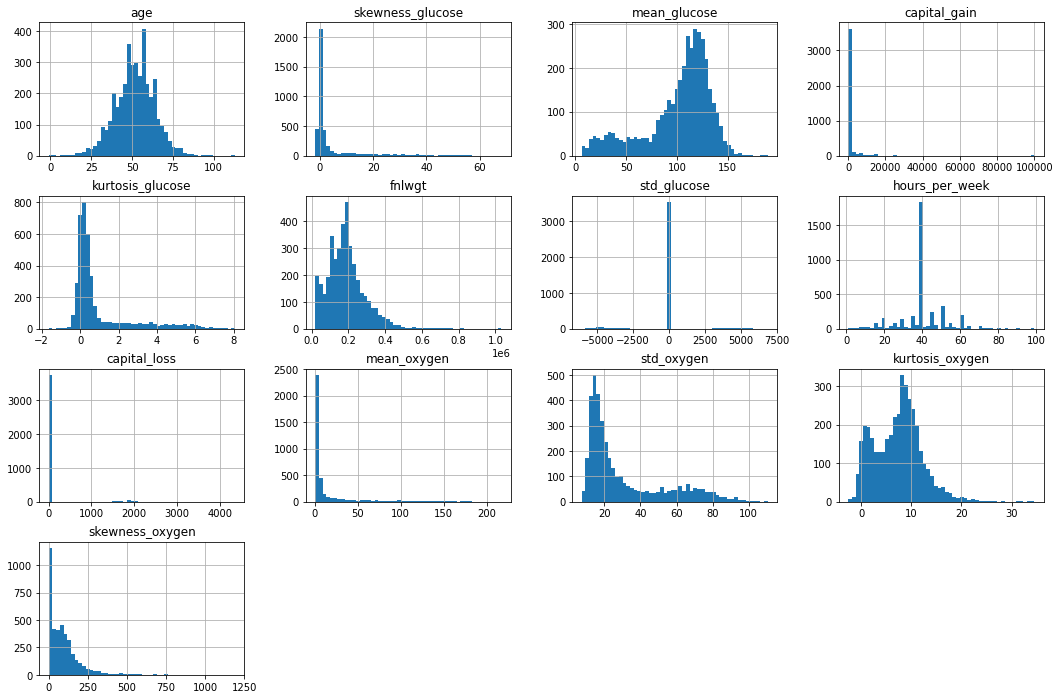

In [146]:
train_data[numeric_columns].hist(figsize=(18, 12), bins=50)

Vidíme, že žiadne atribúty nemajú normálne rozdelenie, okrem atribútu age, ktorého rozdelenie vyzerá celkom symetricky. Ideme teda upraviť hodnoty v stĺpcoch, tak aby boli symetrickejšie. Na preškálovanie hodnôt použijeme PowerTransformer a konkrétne yeo-johnson metódu, ktorá dokáže pracovať ako s kladnými tak aj so zápornými hodnotami. 

In [147]:
pt = PowerTransformer()
train_data.loc[:, numeric_columns] = pt.fit_transform(train_data.loc[:, numeric_columns])

Poďme sa pozrieť, ako vyzerajú distribúcie atribútov po preškálovaní hodnôt.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'skewness_glucose'}>,
        <AxesSubplot:title={'center':'mean_glucose'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'kurtosis_glucose'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'std_glucose'}>,
        <AxesSubplot:title={'center':'hours_per_week'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>,
        <AxesSubplot:title={'center':'std_oxygen'}>,
        <AxesSubplot:title={'center':'kurtosis_oxygen'}>],
       [<AxesSubplot:title={'center':'skewness_oxygen'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

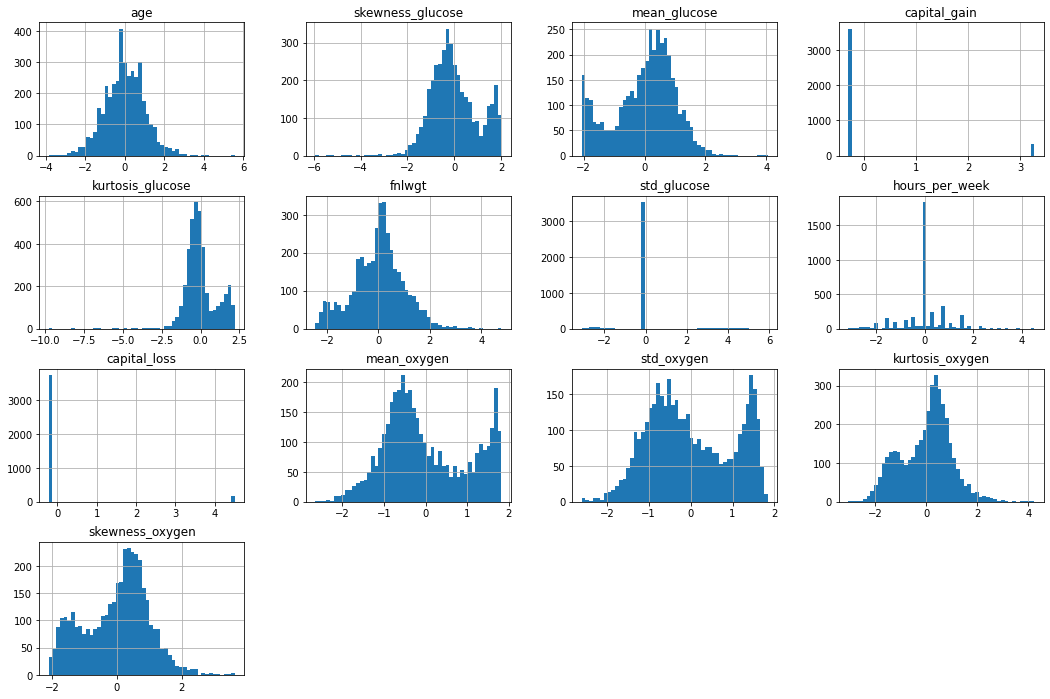

In [148]:
train_data[numeric_columns].hist(figsize=(18, 12), bins=50)

Vidíme, že distribúcie sa teraz o niečo viac podobajú normálnemu rozdeleniu, aj keď väčšina nie je stále úplne symetrická.

Vytvoríme si aj triedu, ktorú využijeme v pipeline.

In [149]:
class CustomPowerTransformer(TransformerMixin):
    
    def __init__(self, atributes):
        self.atributes = atributes
        self.pt = PowerTransformer()
        
    def fit(self, X, y= None):
        self.pt.fit(X.loc[:, self.atributes])
        return self
    
    def transform(self, X):
        X.loc[:, self.atributes] = self.pt.transform(X.loc[:,self.atributes])
        return X

In [150]:
scaler = CustomPowerTransformer(numeric_columns)

train_data_copy = scaler.fit_transform(train_data_copy)

In [151]:
for column in train_data_copy.columns:
    print(column, train_data_copy[column].equals(train_data[column]))

age True
sex True
race True
marital_status True
occupation True
pregnant True
education_num True
relationship True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
fnlwgt True
diabetes True
std_glucose True
income True
native_country True
hours_per_week True
capital_loss True
workclass True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


### Odstraňovanie outlierov

Pozrime sa na vychýlené hodnoty niektorých atribútov. Pre vizuálne znázornenie využijeme boxplot.

<AxesSubplot:xlabel='mean_glucose'>

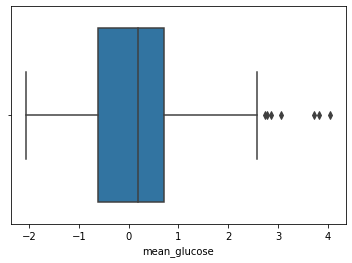

In [152]:
sns.boxplot(x=train_data['mean_glucose'])

In [153]:
train_data['mean_glucose'].max()

4.05143054130838

Na detekovanie outlierov použijeme Interquartile Range Method (IRQ). Záznamy s hodnotami pod našou spodnou hranicou a hodnoty nad hornou hranicou odstránime.

Na zistenie dolnej hranice využijeme vzorec:

    below = Q1 - 1.5 * IQR, kde Q1 je 25. percentil a IQR je medzikvartilový rozsah.

Hornú hranicu si určíme veľmi podobne:

    above = Q3 + 1.5 * IQR, kde Q3 je 75. percentil a IQR je medzikvartilový rozsah.

In [154]:
Q1 = np.percentile(train_data['mean_glucose'], 25, interpolation = 'midpoint')  
Q3 = np.percentile(train_data['mean_glucose'], 75, interpolation = 'midpoint')  
IQR = Q3 - Q1

In [155]:
train_data.loc[train_data['mean_glucose'] < Q1-1.5*IQR , 'mean_glucose'].count()

0

In [156]:
train_data.loc[train_data['mean_glucose'] > Q3+1.5*IQR , 'mean_glucose'].count()

7

Vidíme, že celkový počet outliers atribútu mean_glucose je 7. Tieto záznamy z datasetu odstránime.

In [157]:
train_data = train_data[train_data.mean_glucose < Q3+1.5*IQR]
train_data = train_data[train_data.mean_glucose > Q1-1.5*IQR]

Vytvoríme si na to aj triedu, ktorú využijeme neskôr v pipeline.

In [158]:
class OutliersMeanGlucose(TransformerMixin):
    
    def __init__(self):
        self.below = ""
        self.above = ""
        
    def fit(self, df, y = None):
        Q1 = np.percentile(df['mean_glucose'], 25, interpolation = 'midpoint')  
        Q3 = np.percentile(df['mean_glucose'], 75, interpolation = 'midpoint')  

        IQR = Q3 - Q1
        self.below = Q1-1.5*IQR
        self.above = Q3+1.5*IQR

        return self
    
    def transform(self, df, y = None):
        df = df[df.mean_glucose < self.above]
        df = df[df.mean_glucose > self.below]


        return df


<AxesSubplot:xlabel='mean_glucose'>

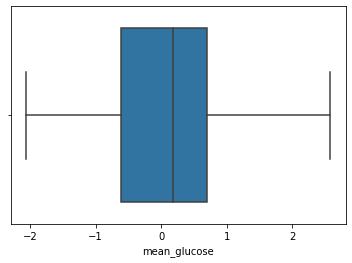

In [159]:
sns.boxplot(x=train_data['mean_glucose'])

In [160]:
train_data['mean_glucose'].max()

2.584364300312394

Záznamy s vychýlenými hodnotami tohto atribútu boli odstránené.

Pokračujeme s úpravou vychýlených hodnôt ďalších outlierov.

<AxesSubplot:xlabel='skewness_glucose'>

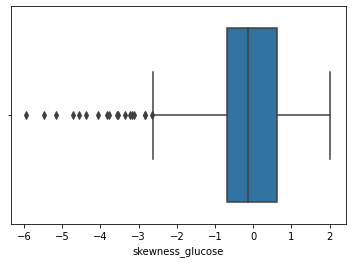

In [161]:
sns.boxplot(x=train_data['skewness_glucose'])

Vidíme, že outliers sa nachádzajú na ľavej strane grafu - pozrime si najmenšiu hodnotu a počet, koľko záznamov takúto hodnotu obsahuje.

In [162]:
train_data['skewness_glucose'].min()

-5.94665859438389

Najmenšia vyskytujúca sa hodnota je -5,947.

Skúsme si pozrieť iný atribút.

<AxesSubplot:xlabel='fnlwgt'>

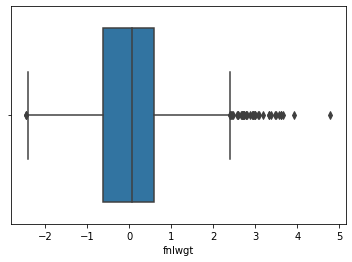

In [163]:
sns.boxplot(x=train_data['fnlwgt'])

In [164]:
train_data['fnlwgt'].max()

4.783110942798183

Vidíme, že aj tu sú nejaké outliers.

Aj v tomto prípade použijeme na detekovanie outlierov Interquartile Range (IRQ) metódu. Hodnoty pod našou spodnou hranicou tentokrát nahradíme hodnotou 5. percentilu a hodnoty nad hornou hranicou nahradíme 95. percentilom. 

Na zistenie dolnej hranice využijeme vzorec:
    
    below = Q1 - 1.5 * IQR, kde Q1 je 25. percentil a IQR je medzikvartilový rozsah.
    
Hornú hranicu si určíme veľmi podobne:
    
    above = Q3 + 1.5 * IQR, kde Q3 je 75. percentil a IQR je medzikvartilový rozsah.

In [165]:
outliers = ['skewness_glucose', 'fnlwgt','age', 'capital_gain', 'capital_loss', 'std_glucose', 'kurtosis_glucose','mean_oxygen', 'std_oxygen', 'skewness_oxygen', 'kurtosis_oxygen']
for atr in outliers:
    Q1 = np.percentile(train_data[atr], 25, interpolation = 'midpoint')  
    Q3 = np.percentile(train_data[atr], 75, interpolation = 'midpoint')  

    IQR = Q3 - Q1
    below = Q1-1.5*IQR
    above = Q3+1.5*IQR

    Q5 = np.percentile(train_data[atr], 5, interpolation = 'midpoint')  
    Q95 = np.percentile(train_data[atr], 95, interpolation = 'midpoint')
    
    train_data.loc[train_data[atr] < below, atr] = Q5
    train_data.loc[train_data[atr] > above, atr] = Q95

Pripravíme si tiež triedu, ktorú budeme využívať v pipeline.

Pozrime sa na vychýlené hodnoty jednotlivých atribútov teraz.

<AxesSubplot:xlabel='skewness_glucose'>

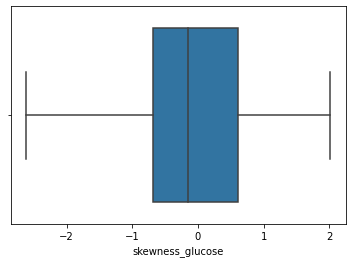

In [166]:
sns.boxplot(x=train_data['skewness_glucose'])

In [167]:
train_data['skewness_glucose'].min()

-2.6198596790615074

Vidíme, že vychýlené hodnoty boli skutočne nahradené.

<AxesSubplot:xlabel='fnlwgt'>

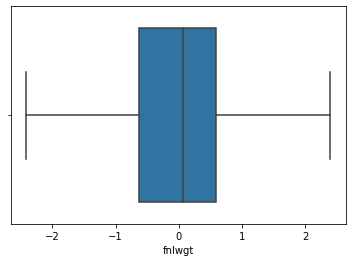

In [168]:
sns.boxplot(x=train_data['fnlwgt'])

In [169]:
train_data['fnlwgt'].max()

2.3927457692259426

Aj v prípade atribútu fnlwgt boli outliers nahradené.

In [170]:
class Outliers(TransformerMixin):
    
    def __init__(self, atributes):
        self.atributes = atributes
        self.dictionary = {}
        
    def fit(self, df, y = None):
        for atr in self.atributes:
            Q1 = np.percentile(df[atr], 25, interpolation = 'midpoint')  
            Q3 = np.percentile(df[atr], 75, interpolation = 'midpoint')  

            IQR = Q3 - Q1
            below = Q1-1.5*IQR
            above = Q3+1.5*IQR

            Q5 = np.percentile(df[atr], 5, interpolation = 'midpoint')  
            Q95 = np.percentile(df[atr], 95, interpolation = 'midpoint')
            
            self.dictionary[atr] = [below, above, Q5, Q95]
        return self
    
    def transform(self, df, y = None):
        for atr in self.atributes:
            
#             print("pocet spodnych outlierov atributu", atr, ": ", df.loc[df[atr] < self.dictionary[atr][0], atr].count())
#             print("pocet hornych outlierov atributu", atr, ": ", df.loc[df[atr] > self.dictionary[atr][1], atr].count())
            df.loc[df[atr] < self.dictionary[atr][0], atr] = self.dictionary[atr][2]
            df.loc[df[atr] > self.dictionary[atr][1], atr] = self.dictionary[atr][3]

        return df


Do poľa outliers si uložíme všetky atribúty, ktorých vychýlené hodnoty chceme upravovať. S využitím pipeline sputíme našu vytvorenú triedu a nahradíme nechcené hodnoty.

In [171]:
outliers = ['skewness_glucose', 'fnlwgt','age', 'capital_gain', 'capital_loss', 'std_glucose', 'kurtosis_glucose','mean_oxygen', 'std_oxygen', 'skewness_oxygen', 'kurtosis_oxygen']

outliers_pipeline = Pipeline( steps = [
    ('outliers_delete', OutliersMeanGlucose()),
    ('outliers', Outliers(outliers))
])

train_data_copy = outliers_pipeline.fit_transform(train_data_copy)

Overíme si, že naša pipeline funguje rovnako ako postupné úpravy.

In [172]:
for column in train_data_copy.columns:
    print(column, train_data_copy[column].equals(train_data[column]))

age True
sex True
race True
marital_status True
occupation True
pregnant True
education_num True
relationship True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
fnlwgt True
diabetes True
std_glucose True
income True
native_country True
hours_per_week True
capital_loss True
workclass True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


## Prevedenie kategorických hodnôt na numerické

Pozrieme sa na kategorické atribúty, ktoré sa nachádzajú v našom datasete.

In [173]:
train_data_obj = train_data.select_dtypes(['object'])

train_data_obj

,sex,race,marital_status,occupation,relationship,income,native_country,workclass
0,Male,White,Never-married,Other_service,Own-child,<=50K,United-States,Private
1,Male,White,Married-civ-spouse,Prof_specialty,Married,<=50K,United-States,Self-emp-not-inc
2,Female,White,Never-married,Adm_clerical,Not-in-family,<=50K,United-States,Private
3,Male,Black,Divorced,Craft_repair,Other-relative,<=50K,United-States,Self-emp-not-inc
4,Male,White,Married-civ-spouse,Transport_moving,Married,<=50K,United-States,Private
...,...,...,...,...,...,...,...,...
3928,Female,White,Never-married,Sales,Own-child,<=50K,United-States,Private
3929,Male,White,Never-married,Handlers_cleaners,Not-in-family,<=50K,United-States,Private
3930,Male,White,Married-civ-spouse,Transport_moving,Married,<=50K,United-States,Private
3931,Male,White,Never-married,Adm_clerical,Own-child,<=50K,United-States,Private


V datasete ostalo 8 kategorických atribútov.

In [174]:
for column in train_data_obj.columns:
    print(column, len(train_data_obj[column].unique()))

sex 2
race 5
marital_status 7
occupation 15
relationship 5
income 2
native_country 39
workclass 7


V datasete sa nachádzajú kategorické atribúty s malým ale aj väčším počtom unikátnych hodnôt. Chceli by sme na encoding použiť jednotnú techniku pre všetky kategorické atribúty. Ako dobrá voľba sa nám zdá binárny encoding. Avšak na atribút income, použijeme ordinal encoding, keďže medzi ním a atribútom education_num (ktorý je tiež encodovaný ordinálne) existuje vzťah. Toto si môžeme aj ukázať.

In [175]:
pd.crosstab(index=train_data["income"], columns=train_data["education_num"])

education_num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
income,,,,,,,,,,,,,,,,
<=50K,5,16,39,82,58,105,142,42,1078,721,127,87,369,103,11,17
>50K,0,0,1,3,3,11,6,5,175,164,43,34,270,112,60,37


Vidíme, že čím vyšší stupeň vzdelania pacienti dosiahli, tým je pomer lepšie zarábajúcich oproti menej zarábajúcim vyšší.

In [176]:
binary_enc_columns = ['sex', 'race', 'marital_status', 'occupation', 'relationship', 'native_country', 'workclass']

In [177]:
binary_enc = ce.BinaryEncoder(cols=binary_enc_columns)

train_data = binary_enc.fit_transform(train_data)

d:\skola\5.semester\iau\iau-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [178]:
train_data.head()

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0.861398,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,10.0,0,0,0,1,0.360260,-0.829432,-0.305135,0.823003,-0.340736,1.0,-0.058187,<=50K,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.583795,1.562141,-1.475335,-1.625046
1,-0.510624,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,9.0,0,0,1,0,1.761152,-1.506956,-0.305135,1.769538,0.993762,1.0,-0.077018,<=50K,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,1,0,1.560693,1.590337,-1.440962,-1.612546
2,1.037452,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.0,10.0,0,0,1,1,1.569910,-1.491132,3.277309,1.444009,0.195704,1.0,-0.074619,<=50K,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.108461,0.311596,0.009854,-0.017051
3,-0.842304,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0.0,8.0,0,1,0,0,0.026023,0.240959,-0.305135,-0.248220,0.637534,0.0,-1.653184,<=50K,0,0,0,0,0,0,1,-0.435459,-0.22154,0,0,1,0,-0.688656,-0.977466,0.589161,0.701640
4,1.571052,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,5.0,0,0,1,0,1.420407,-1.337085,-0.305135,1.250420,0.829783,1.0,-0.044644,<=50K,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.654854,0.804758,-0.551270,-0.597958


Kategorické atribúty okrem income sú teraz reprezentované binárne.

In [179]:
ordinal_enc_columns = ['income']
ordinal_enc = ce.OrdinalEncoder(ordinal_enc_columns)

train_data = ordinal_enc.fit_transform(train_data)

In [180]:
train_data.head()

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0.861398,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,10.0,0,0,0,1,0.360260,-0.829432,-0.305135,0.823003,-0.340736,1.0,-0.058187,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.583795,1.562141,-1.475335,-1.625046
1,-0.510624,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,9.0,0,0,1,0,1.761152,-1.506956,-0.305135,1.769538,0.993762,1.0,-0.077018,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,1,0,1.560693,1.590337,-1.440962,-1.612546
2,1.037452,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.0,10.0,0,0,1,1,1.569910,-1.491132,3.277309,1.444009,0.195704,1.0,-0.074619,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.108461,0.311596,0.009854,-0.017051
3,-0.842304,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0.0,8.0,0,1,0,0,0.026023,0.240959,-0.305135,-0.248220,0.637534,0.0,-1.653184,1,0,0,0,0,0,0,1,-0.435459,-0.22154,0,0,1,0,-0.688656,-0.977466,0.589161,0.701640
4,1.571052,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,5.0,0,0,1,0,1.420407,-1.337085,-0.305135,1.250420,0.829783,1.0,-0.044644,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.654854,0.804758,-0.551270,-0.597958


In [181]:
train_data.income.unique()

array([1, 2])

In [182]:
train_data.income.value_counts().idxmax()

1

Vidíme, že hodnoty v stĺpci unique sa nám zmenili na čísla - hodnota ,,<=50K" na 1 a hodnota ,,>50K" na 2.

Vytvoríme si pipeline na encoding.

In [183]:
binary_enc_columns = ['sex', 'race', 'marital_status', 'occupation', 'relationship', 'native_country', 'workclass']
ordinal_enc_columns = ['income']

enc_pipeline = Pipeline(steps=[
    ('binary_encoder', ce.BinaryEncoder(cols=binary_enc_columns)),
    ('ordinal_encoder', ce.OrdinalEncoder(ordinal_enc_columns))
])

Otestujeme pipeline na kópií datasetu.

In [184]:
train_data_copy = enc_pipeline.fit_transform(train_data_copy)

d:\skola\5.semester\iau\iau-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [185]:
train_data_copy.head()

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0.861398,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,10.0,0,0,0,1,0.360260,-0.829432,-0.305135,0.823003,-0.340736,1.0,-0.058187,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.583795,1.562141,-1.475335,-1.625046
1,-0.510624,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,9.0,0,0,1,0,1.761152,-1.506956,-0.305135,1.769538,0.993762,1.0,-0.077018,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,1,0,1.560693,1.590337,-1.440962,-1.612546
2,1.037452,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.0,10.0,0,0,1,1,1.569910,-1.491132,3.277309,1.444009,0.195704,1.0,-0.074619,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.108461,0.311596,0.009854,-0.017051
3,-0.842304,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0.0,8.0,0,1,0,0,0.026023,0.240959,-0.305135,-0.248220,0.637534,0.0,-1.653184,1,0,0,0,0,0,0,1,-0.435459,-0.22154,0,0,1,0,-0.688656,-0.977466,0.589161,0.701640
4,1.571052,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,5.0,0,0,1,0,1.420407,-1.337085,-0.305135,1.250420,0.829783,1.0,-0.044644,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.654854,0.804758,-0.551270,-0.597958


In [186]:
for column in train_data_copy.columns:
    print(column, train_data_copy[column].equals(train_data[column]))

age True
sex_0 True
sex_1 True
race_0 True
race_1 True
race_2 True
race_3 True
marital_status_0 True
marital_status_1 True
marital_status_2 True
marital_status_3 True
occupation_0 True
occupation_1 True
occupation_2 True
occupation_3 True
occupation_4 True
pregnant True
education_num True
relationship_0 True
relationship_1 True
relationship_2 True
relationship_3 True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
fnlwgt True
diabetes True
std_glucose True
income True
native_country_0 True
native_country_1 True
native_country_2 True
native_country_3 True
native_country_4 True
native_country_5 True
native_country_6 True
hours_per_week True
capital_loss True
workclass_0 True
workclass_1 True
workclass_2 True
workclass_3 True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


Obidva datasety sú rovnaké - pipeline na encoding funguje správne.

## Pipeline

Teraz pridáme všetky doterajšie úpravy do jednej finálnej pipeline. Triedy a pipeline-y, ktoré pridávama do tejto finálnej pipeline boli tvorené a testované priebežne počas procesu predspracovania. 

In [187]:
numeric_columns = ['age', 'skewness_glucose', 'mean_glucose', 'capital_gain', 'kurtosis_glucose', 'fnlwgt', 'std_glucose', 'hours_per_week', 'capital_loss', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']
    
pipeline = Pipeline(steps=[
        ('first_preprocessing', FirstPreprocessing()),
        ('impute', impute_pipeline),
        ('column_drop', ColumnDrop()),
        ('power_transform', CustomPowerTransformer(numeric_columns)),
        ('outliers', outliers_pipeline),
        ('encoding', enc_pipeline)
    ])

In [188]:
train_data_copy1 = pipeline.fit_transform(train_data_copy1)
train_data_copy2 = pipeline.transform(train_data_copy2)

d:\skola\5.semester\iau\iau-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
d:\skola\5.semester\iau\iau-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [189]:
for column in train_data_copy2.columns:
    print(column, train_data_copy2[column].equals(train_data_copy1[column]))

age True
sex_0 True
sex_1 True
race_0 True
race_1 True
race_2 True
race_3 True
marital_status_0 True
marital_status_1 True
marital_status_2 True
marital_status_3 True
occupation_0 True
occupation_1 True
occupation_2 True
occupation_3 True
occupation_4 True
pregnant True
education_num True
relationship_0 True
relationship_1 True
relationship_2 True
relationship_3 True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
fnlwgt True
diabetes True
std_glucose True
income True
native_country_0 True
native_country_1 True
native_country_2 True
native_country_3 True
native_country_4 True
native_country_5 True
native_country_6 True
hours_per_week True
capital_loss True
workclass_0 True
workclass_1 True
workclass_2 True
workclass_3 True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


In [190]:
for column in train_data_copy2.columns:
    print(column, train_data_copy2[column].equals(train_data[column]))

age True
sex_0 True
sex_1 True
race_0 True
race_1 True
race_2 True
race_3 True
marital_status_0 True
marital_status_1 True
marital_status_2 True
marital_status_3 True
occupation_0 True
occupation_1 True
occupation_2 True
occupation_3 True
occupation_4 True
pregnant True
education_num True
relationship_0 True
relationship_1 True
relationship_2 True
relationship_3 True
skewness_glucose True
mean_glucose True
capital_gain True
kurtosis_glucose True
fnlwgt True
diabetes True
std_glucose True
income True
native_country_0 True
native_country_1 True
native_country_2 True
native_country_3 True
native_country_4 True
native_country_5 True
native_country_6 True
hours_per_week True
capital_loss True
workclass_0 True
workclass_1 True
workclass_2 True
workclass_3 True
mean_oxygen True
std_oxygen True
kurtosis_oxygen True
skewness_oxygen True


Vidíme, že 3 datasety sú zhodné. Týmto sme si overili, že výsledná pipeline funguje správne a že funguje ako volanie fit_transform tak aj transform.

## Prieskumná analýza po realizácii predspracovania

V premennej train_data_original sme si odložili pôvodné dáta. Teraz si ich môžeme zobraziť a porovnať s tými upravenými.

### Základný opis dát spolu s ich charakteristikami

In [191]:
train_data_original.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH 53211",59,Male,1960-05-15,White,Never-married,Adm-clerical,FALSE,10.0,Own-child,36.335744,31.703125,0.0,5.781622,Some-college,108495.0,1.0,29.179766,<=50K,"{'mean_oxygen':'163.5769231','std_oxygen':'45.86972539999999','kurtosis_oxygen':'-0.180266075','skewness_oxygen':'-0.464227987'}",India,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN 57550",45,Male,1973/12/03,White,Never-married,Other-service,f,10.0,Not-in-family,0.295725,124.875,0.0,0.073829,Some-college,235271.0,0.0,45.617294,<=50K,"{'mean_oxygen':'9.899665552','std_oxygen':'37.31527479','kurtosis_oxygen':'4.086775553','skewness_oxygen':'16.784358800000003'}",United-States,35.0,0.0,Self-emp-not-inc
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47,Female,1971-12-22,White,Never-married,?,f,10.0,Own-child,1.336401,108.7109375,0.0,0.636642,Some-college,194096.0,0.0,38.811675,<=50K,"{'mean_oxygen':'3.258361204','std_oxygen':'22.6477159','kurtosis_oxygen':'8.108096424','skewness_oxygen':'70.22644286'}",United-States,40.0,0.0,?
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",68,Male,1951-01-08,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,3.110169,91.328125,0.0,0.694783,Bachelors,262285.0,0.0,34.690847,<=50K,"{'mean_oxygen':'0.644648829','std_oxygen':'10.91614342','kurtosis_oxygen':'20.50089209','skewness_oxygen':'449.2782643'}",United-States,99.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 77139",62,Male,1957-05-05,White,Never-married,Other-service,f,7.0,Own-child,0.190579,143.7109375,0.0,-0.193885,11th,266681.0,0.0,47.219592,<=50K,"{'mean_oxygen':'1.191471572','std_oxygen':'9.935542807000001','kurtosis_oxygen':'16.58796639','skewness_oxygen':'371.4528926'}",United-States,20.0,0.0,Private


In [192]:
train_data.head()

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,0.861398,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,10.0,0,0,0,1,0.360260,-0.829432,-0.305135,0.823003,-0.340736,1.0,-0.058187,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,1.583795,1.562141,-1.475335,-1.625046
1,-0.510624,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0.0,9.0,0,0,1,0,1.761152,-1.506956,-0.305135,1.769538,0.993762,1.0,-0.077018,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,1,0,1.560693,1.590337,-1.440962,-1.612546
2,1.037452,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.0,10.0,0,0,1,1,1.569910,-1.491132,3.277309,1.444009,0.195704,1.0,-0.074619,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.108461,0.311596,0.009854,-0.017051
3,-0.842304,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0.0,8.0,0,1,0,0,0.026023,0.240959,-0.305135,-0.248220,0.637534,0.0,-1.653184,1,0,0,0,0,0,0,1,-0.435459,-0.22154,0,0,1,0,-0.688656,-0.977466,0.589161,0.701640
4,1.571052,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0.0,5.0,0,0,1,0,1.420407,-1.337085,-0.305135,1.250420,0.829783,1.0,-0.044644,1,0,0,0,0,0,0,1,-0.042569,-0.22154,0,0,0,1,0.654854,0.804758,-0.551270,-0.597958


Na prvý pohľad sa ani nezdá, že to sú tie isté dáta. Vidíme, že sa nám zmenili názvy aj počty stĺpcov a takisto hodnoty v nich. 

In [193]:
train_data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3966 non-null   object 
 6   marital-status    3969 non-null   object 
 7   occupation        3970 non-null   object 
 8   pregnant          3970 non-null   object 
 9   education-num     3968 non-null   float64
 10  relationship      3972 non-null   object 
 11  skewness_glucose  3967 non-null   float64
 12  mean_glucose      3404 non-null   object 
 13  capital-gain      3971 non-null   float64
 14  kurtosis_glucose  3968 non-null   float64
 15  education         3964 non-null   object 
 16  fnlwgt            3971 non-null   float64


V pôvodnom datasete sa nachádza 25 stĺpcov. Veľa z nich obsahuje nulové hodnoty. Dátové typy a ich počty: float64(9), int64(1), object(15).

In [194]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 0 to 3932
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3926 non-null   float64
 1   sex_0             3926 non-null   int64  
 2   sex_1             3926 non-null   int64  
 3   race_0            3926 non-null   int64  
 4   race_1            3926 non-null   int64  
 5   race_2            3926 non-null   int64  
 6   race_3            3926 non-null   int64  
 7   marital_status_0  3926 non-null   int64  
 8   marital_status_1  3926 non-null   int64  
 9   marital_status_2  3926 non-null   int64  
 10  marital_status_3  3926 non-null   int64  
 11  occupation_0      3926 non-null   int64  
 12  occupation_1      3926 non-null   int64  
 13  occupation_2      3926 non-null   int64  
 14  occupation_3      3926 non-null   int64  
 15  occupation_4      3926 non-null   int64  
 16  pregnant          3926 non-null   float64


V novom, upravenom datasete sa nachádza 47 stĺpcov. Tieto zmeny sú spôsobené viacerými faktormi:
    
- V stĺpci medical info boli uložené 4 rôzne údaje. Z tohto stĺpca sme teda vytvorili 4 rôzne - 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen' a 'skewness_oxygen'
- Atribúty, ktoré sme identifikovali ako nie potrebné, sme odstránili - 'name', 'address' (myslíme si, že pre naše potreby stačí údaj atribútu 'native_country'), 'education' (údaje reprezentuje číselnými hodnotami stĺpec 'education_num') a 'date_of_birth' (tento stĺpec sme využili na dopočítanie chýbajúcich hodnôt veku, ale ďalej nám postačuje atribút 'age')
- Po prevedení jednotlivých kategorických atribútov na numerické sa počet stĺpcov znásobil.
- Atribút 'class' sme premenovali na 'diabetes'


Ďalej vidíme, že sa zmenili aj dátové typy jednotlivých artibútov (float64(16), int32(1), int64(30)). Keďže sme prevádzali kategorické atribúty na numerické, dataset obsahuje len číselné dátové typy.

#### Zisťovanie prázdnych hodnôt

Ďalej sa pozrime na prázdne hodnoty jednotlivých atribútov.

In [195]:
train_data_original.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                 17
marital-status       14
occupation           13
pregnant             13
education-num        15
relationship         11
skewness_glucose     16
mean_glucose        579
capital-gain         12
kurtosis_glucose     15
education            19
fnlwgt               12
class                11
std_glucose          14
income               10
medical_info          9
native-country       22
hours-per-week       14
capital-loss         18
workclass            21
dtype: int64

In [196]:
train_data_original[train_data_original['mean_glucose'] == '??']

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
15,Kurt Littlefield,"822 Wilson Meadow\r\nMitchellmouth, RI 05935",27,Male,1992-08-13,White,Married-civ-spouse,Tech-support,f,10.0,Husband,-0.296756,??,0.0,0.162241,Some-college,158746.0,0.0,51.980023,<=50K,"{'mean_oxygen':'3.361204013','std_oxygen':'20.59369566','kurtosis_oxygen':'9.08620027','skewness_oxygen':'92.08264273'}",United-States,40.0,0.0,Private
36,Elmer King,"29688 Lindsey Dale Suite 077\r\nNorth Cassandra, PA 31881",52,Male,1967-01-02,White,Married-civ-spouse,Sales,f,10.0,Husband,-0.400658,??,0.0,0.141863,Some-college,111675.0,0.0,51.695198,<=50K,"{'mean_oxygen':'1.83277592','std_oxygen':'17.55970596','kurtosis_oxygen':'10.53007549','skewness_oxygen':'117.1317754'}",United-States,43.0,0.0,Private
42,Stephen Genova,"512 Duffy Lakes\r\nAlexmouth, WY 86476",65,Male,1954-06-12,White,Never-married,Farming-fishing,f,10.0,Own-child,3.693909,??,0.0,1.348453,Some-college,164658.0,1.0,44.202718,<=50K,"{'mean_oxygen':'11.95401338','std_oxygen':'44.68897037','kurtosis_oxygen':'3.864755838','skewness_oxygen':'14.07733523'}",United-States,60.0,0.0,Self-emp-inc
64,Pedro Sayle,"8864 Taylor Shoal\r\nStevenhaven, WA 77253",39,Female,1980-05-23,White,Divorced,Other-service,f,9.0,Not-in-family,-0.143556,??,0.0,0.027845,HS-grad,80430.0,0.0,48.810477,<=50K,"{'mean_oxygen':'1.697324415','std_oxygen':'15.626665300000004','kurtosis_oxygen':'11.05004847','skewness_oxygen':'135.9545736'}",United-States,40.0,0.0,Private
92,Robert Killinger,"09437 Diana Ford Apt. 873\r\nDelgadoside, AK 71380",51,Male,1968-06-28,White,Married-civ-spouse,Prof-specialty,f,13.0,Husband,33.626620,??,0.0,5.727785,Bachelors,229651.0,1.0,-3271.276509,>50K,"{'mean_oxygen':'98.8361204','std_oxygen':'70.27478246','kurtosis_oxygen':'0.603461049','skewness_oxygen':'-0.497938612'}",United-States,50.0,0.0,Local-gov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,Todd Longie,"09050 Phillips Wells Apt. 538\r\nRileymouth, NV 46699",48,Male,71-08-01,White,Never-married,Craft-repair,f,14.0,Not-in-family,-0.503301,??,0.0,0.139425,Masters,204527.0,0.0,53.586151,>50K,"{'mean_oxygen':'32.60535117','std_oxygen':'54.60369324','kurtosis_oxygen':'1.977399488','skewness_oxygen':'4.032597007'}",United-States,50.0,0.0,Private
3881,Matthew Anderson,"0892 Rivera Plain Suite 387\r\nSouth Brooke, NH 56488",64,Female,1955/01/10,Black,Widowed,Other-service,f,9.0,Other-relative,-0.475104,??,0.0,-0.108507,HS-grad,217210.0,0.0,49.763125,<=50K,"{'mean_oxygen':'3.980769231','std_oxygen':'21.23114071','kurtosis_oxygen':'6.989964363','skewness_oxygen':'55.28489273'}",United-States,40.0,0.0,Self-emp-not-inc
3930,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,NaN,f,8.0,Husband,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,"{'mean_oxygen':'1.535117057','std_oxygen':'13.05588468','kurtosis_oxygen':'12.88065153','skewness_oxygen':'200.7338555'}",NaN,NaN,0.0,Private
3931,John Casares,Unit 2369 Box 4871\r\nDPO AA 98117,60,Male,09/12/1958,White,Married-civ-spouse,Craft-repair,NaN,8.0,NaN,0.038068,??,0.0,0.162843,12th,83704.0,0.0,48.537376,<=50K,"{'mean_oxygen':'1.535117057','std_oxygen':'13.05588468','kurtosis_oxygen':'12.88065153','skewness_oxygen':'200.7338555'}",NaN,40.0,0.0,Private


In [197]:
train_data.isnull().sum()

age                 0
sex_0               0
sex_1               0
race_0              0
race_1              0
race_2              0
race_3              0
marital_status_0    0
marital_status_1    0
marital_status_2    0
marital_status_3    0
occupation_0        0
occupation_1        0
occupation_2        0
occupation_3        0
occupation_4        0
pregnant            0
education_num       0
relationship_0      0
relationship_1      0
relationship_2      0
relationship_3      0
skewness_glucose    0
mean_glucose        0
capital_gain        0
kurtosis_glucose    0
fnlwgt              0
diabetes            0
std_glucose         0
income              0
native_country_0    0
native_country_1    0
native_country_2    0
native_country_3    0
native_country_4    0
native_country_5    0
native_country_6    0
hours_per_week      0
capital_loss        0
workclass_0         0
workclass_1         0
workclass_2         0
workclass_3         0
mean_oxygen         0
std_oxygen          0
kurtosis_o

In [198]:
train_data[train_data['mean_glucose'] == '??']

d:\skola\5.semester\iau\iau-env\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Všetky chýbajúce a "otáznikové" hodnoty boli nahradené.

Teraz si nad originálnymi dátami spustíme prvú úpravu (pretypovanie, rozdelenie stĺpca "medical_info" a zjednotenie formátov hodnôt atribútov. Spravíme to preto, aby sme mohli vykresliť grafy a vizuálne analyzovať (napríklad atribút mean_glucose je potrebné pretypovať na numerickú hodnotu).

In [199]:
train_data_original = first_preprocessing.transform(train_data_original)

#### Deskriptívne štatistiky

Vytvoríme základné deskriptívne štatistiky pre obidva datasety.

In [200]:
train_data_original.describe()

,age,pregnant,education_num,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,hours_per_week,capital_loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3933.000000,3932.000000,3932.000000,3932.000000,3196.000000,3933.000000,3933.000000,3.933000e+03,3933.000000,3933.000000,3932.000000,3931.000000,3933.000000,3933.000000,3933.000000,3933.000000
mean,51.816934,0.017548,10.085453,4.219810,101.480219,1048.451309,0.951283,1.887494e+05,0.255276,21.090782,40.600458,87.679980,18.476772,31.153471,7.413506,91.298639
std,11.814803,0.131319,2.581625,9.679146,33.467551,7184.058698,1.610970,1.029052e+05,0.436072,1439.216169,12.736646,404.826523,34.789202,22.267181,4.812170,108.552010
min,-1.000000,0.000000,1.000000,-1.755332,6.187500,0.000000,-1.641515,1.941000e+04,0.000000,-6088.027562,1.000000,0.000000,0.213211,7.370432,-2.597872,-1.976976
25%,44.000000,0.000000,9.000000,-0.120081,88.107422,0.000000,0.072144,1.176180e+05,0.000000,39.279398,40.000000,0.000000,2.065217,15.040684,3.637833,12.866679
50%,52.000000,0.000000,10.000000,0.374657,110.660156,0.000000,0.310784,1.802110e+05,0.000000,45.835260,40.000000,0.000000,3.236622,20.567593,7.782188,68.490474
75%,60.000000,0.000000,12.000000,2.083826,124.244141,0.000000,0.776762,2.362620e+05,1.000000,50.945929,45.000000,0.000000,12.631271,43.221350,10.261581,127.012005
max,113.000000,1.000000,16.000000,68.101622,189.734375,99999.000000,8.069522,1.033222e+06,1.000000,6892.691548,99.000000,4356.000000,217.371238,110.642211,34.539844,1191.000837


In [201]:
train_data.describe()

,age,sex_0,sex_1,race_0,race_1,race_2,race_3,marital_status_0,marital_status_1,marital_status_2,marital_status_3,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,pregnant,education_num,relationship_0,relationship_1,relationship_2,relationship_3,skewness_glucose,mean_glucose,capital_gain,kurtosis_glucose,fnlwgt,diabetes,std_glucose,income,native_country_0,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,hours_per_week,capital_loss,workclass_0,workclass_1,workclass_2,workclass_3,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3926.000000,3926.000000,3926.000000,3926.0,3926.000000,3926.000000,3926.000000,3926.0,3926.000000,3926.000000,3926.000000,3926.0,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.0,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.0,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3.926000e+03,3926.0,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000
mean,-0.001057,0.320428,0.679572,0.0,0.038207,0.099338,0.898625,0.0,0.079725,0.631177,0.491085,0.0,0.241977,0.473001,0.561640,0.523179,0.017575,10.087876,0.0,0.141111,0.711666,0.511971,0.010747,-0.005869,-0.000363,0.022228,-0.013407,0.255731,-0.147693,1.235354,0.0,0.005858,0.023943,0.030565,0.064697,0.037443,0.955680,-0.000078,-2.215395e-01,0.0,0.099083,0.172950,0.856852,-0.001851,-0.001769,-0.006507,-0.004531
std,0.966485,0.466700,0.466700,0.0,0.191720,0.299153,0.301864,0.0,0.270901,0.482547,0.499984,0.0,0.428335,0.499334,0.496249,0.499526,0.131418,2.580509,0.0,0.348180,0.453045,0.499920,0.968231,0.991062,0.999599,0.900578,0.965492,0.436327,0.355293,0.424274,0.0,0.076325,0.152891,0.172159,0.246022,0.189868,0.205831,1.000353,2.775911e-17,0.0,0.298812,0.378252,0.350269,0.998558,0.998859,0.969415,0.983970
min,-2.703753,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,-2.619860,-2.065316,-0.305135,-1.976663,-2.415855,0.000000,-1.653184,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.174089,-2.215395e-01,0.0,0.000000,0.000000,0.000000,-2.649778,-2.603300,-2.697415,-2.101826
25%,-0.677089,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,0.000000,0.000000,0.000000,-0.682766,-0.613706,-0.305135,-0.579388,-0.623056,0.000000,-0.069365,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.042569,-2.215395e-01,0.0,0.000000,0.000000,1.000000,-0.725293,-0.791150,-0.714980,-0.745108
50%,-0.004154,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,10.000000,0.0,0.000000,1.000000,1.000000,-0.145202,0.184499,-0.305135,-0.174379,0.070925,0.000000,-0.064425,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.042569,-2.215395e-01,0.0,0.000000,0.000000,1.000000,-0.260208,-0.171578,0.174538,0.182182
75%,0.686289,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,12.000000,0.0,0.000000,1.000000,1.000000,0.615730,0.703072,-0.305135,0.368926,0.583995,1.000000,-0.060573,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.349007,-2.215395e-01,0.0,0.000000,0.000000,1.000000,0.866812,0.947339,0.644173,0.681537
max,2.660877,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,0.0,1.000000,1.000000,1.000000,2.014803,2.584364,3.277309,1.881748,2.392746,1.000000,-0.044644,2.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.521155,-2.215395e-01,0.0,1.000000,1.000000,1.000000,1.820838,1.845355,2.679850

Vidíme, že v predspracovanom datasete majú atribúty o dosť menší rozsah hodnôt, a teda že hodnoty atribútov o dosť menej rozptýlené.

### Analýza a vizualizácia atribútov

Pozrime si rozdelenia jednotlivých atribútov.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'skewness_glucose'}>,
        <AxesSubplot:title={'center':'mean_glucose'}>,
        <AxesSubplot:title={'center':'kurtosis_glucose'}>],
       [<AxesSubplot:title={'center':'std_glucose'}>,
        <AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>,
        <AxesSubplot:title={'center':'skewness_oxygen'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>,
        <AxesSubplot:title={'center':'kurtosis_oxygen'}>],
       [<AxesSubplot:title={'center':'std_oxygen'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

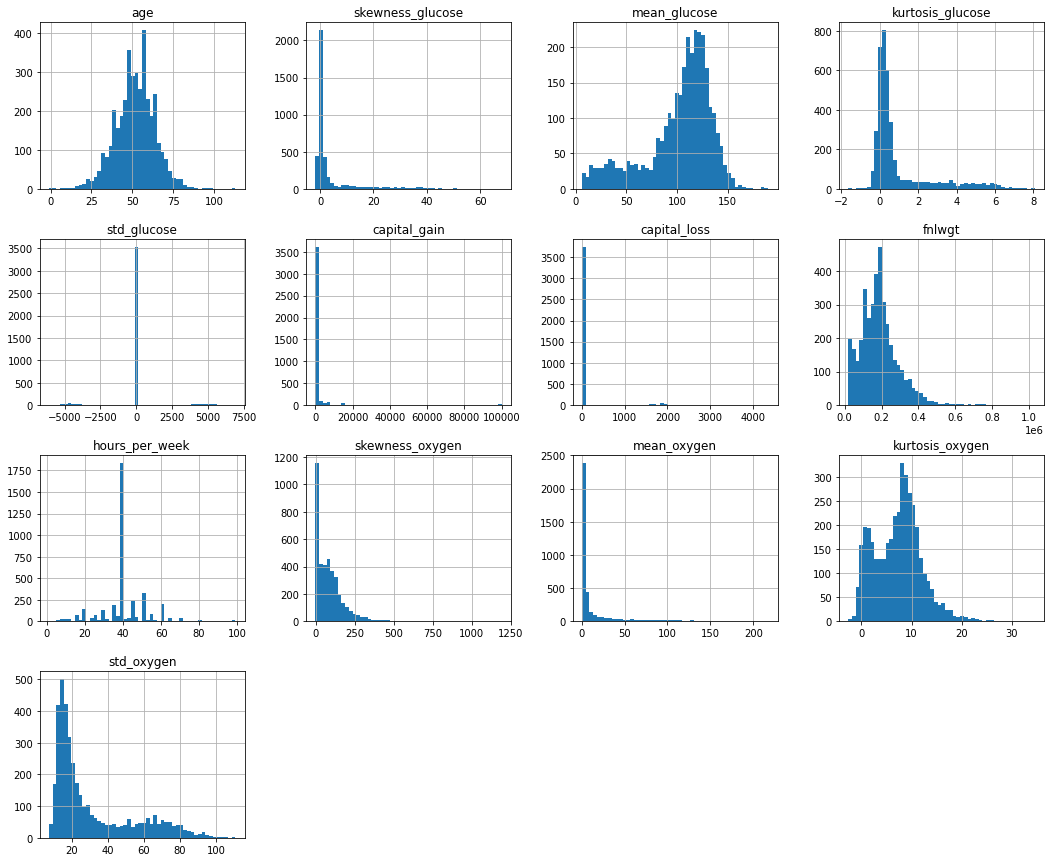

In [202]:
numerics = ['age', 'skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose', 'capital_gain', 'capital_loss', 'fnlwgt', 'hours_per_week', 'skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']
train_data_original[numerics].hist(figsize=(18, 15), bins=50)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'skewness_glucose'}>,
        <AxesSubplot:title={'center':'mean_glucose'}>,
        <AxesSubplot:title={'center':'kurtosis_glucose'}>],
       [<AxesSubplot:title={'center':'std_glucose'}>,
        <AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>,
        <AxesSubplot:title={'center':'skewness_oxygen'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>,
        <AxesSubplot:title={'center':'kurtosis_oxygen'}>],
       [<AxesSubplot:title={'center':'std_oxygen'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

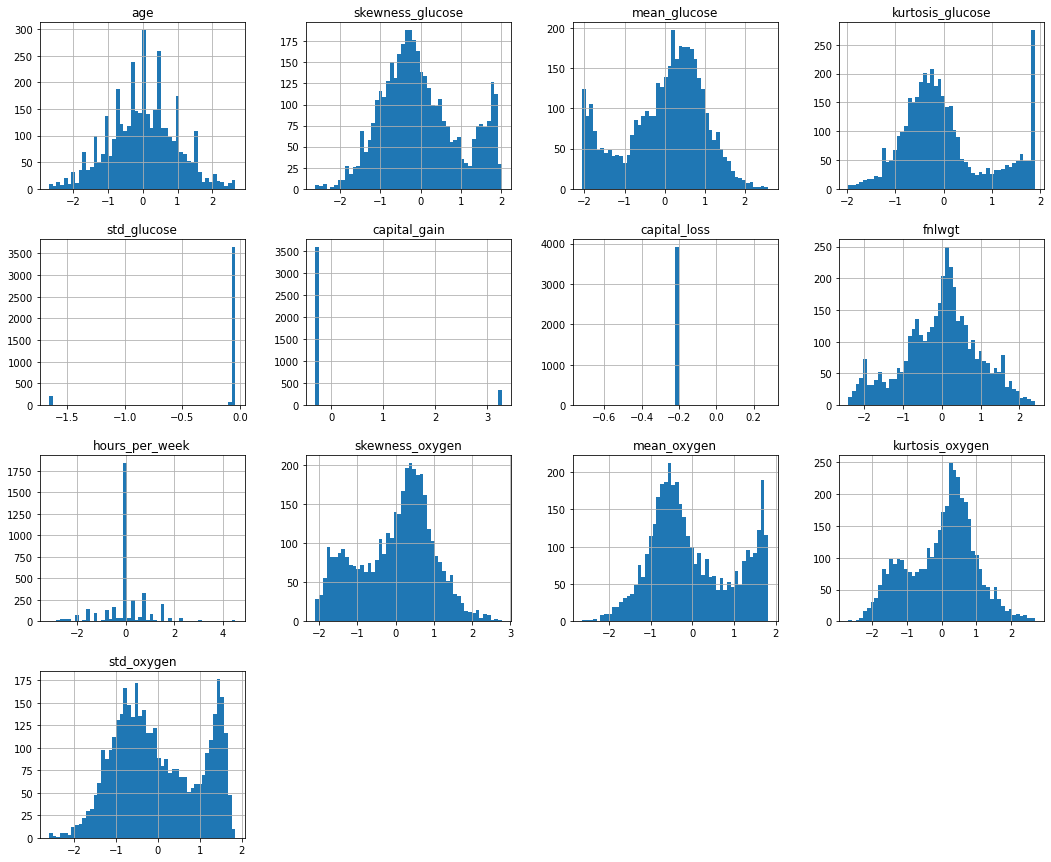

In [203]:
train_data[numerics].hist(figsize=(18, 15), bins=50)

Môžeme si všimnúť zmenu distribúcií a tiež škálovania. Rozsah hodnôt všetkých atribútov je omnoho menší ako bol a všetky atribúty ho majú približne rovnaký. Tiež môžeme vidieť, že distribúcie su o trochu symetrickejšie a viac sa podobajú normálnemu rozdeleniu.

### Párová analýza atribútov

#### Spojitý - spojitý

Vizualizujeme si závislosti jednotlivých atribútov pomocou heat mapy.

<AxesSubplot:>

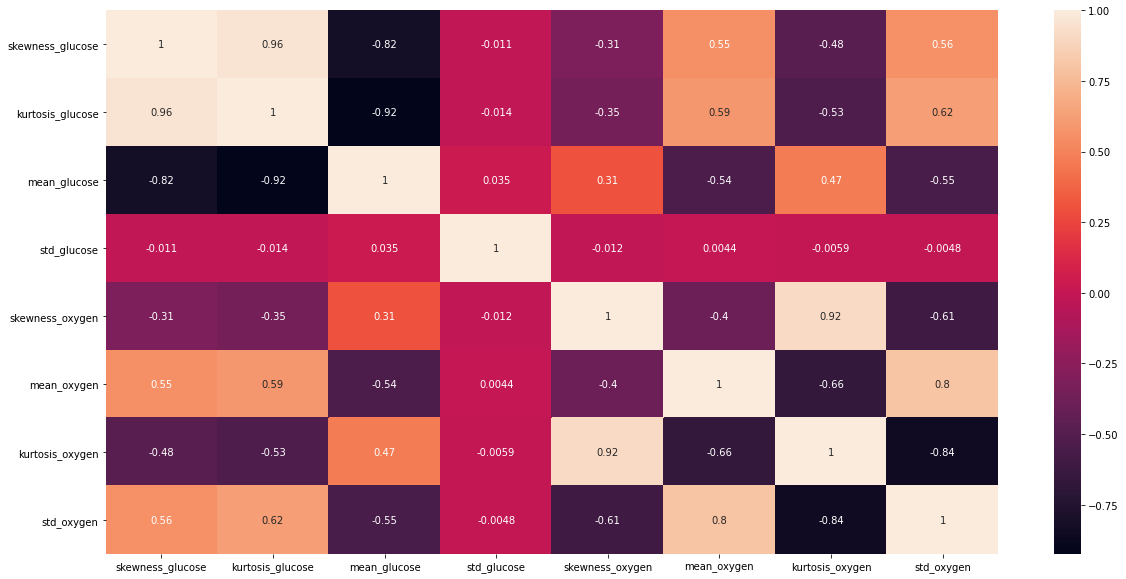

In [204]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_data_original.loc[:, ['skewness_glucose', 'kurtosis_glucose', 'mean_glucose', 'std_glucose', 'skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].corr(), ax=ax, annot=True)

<AxesSubplot:>

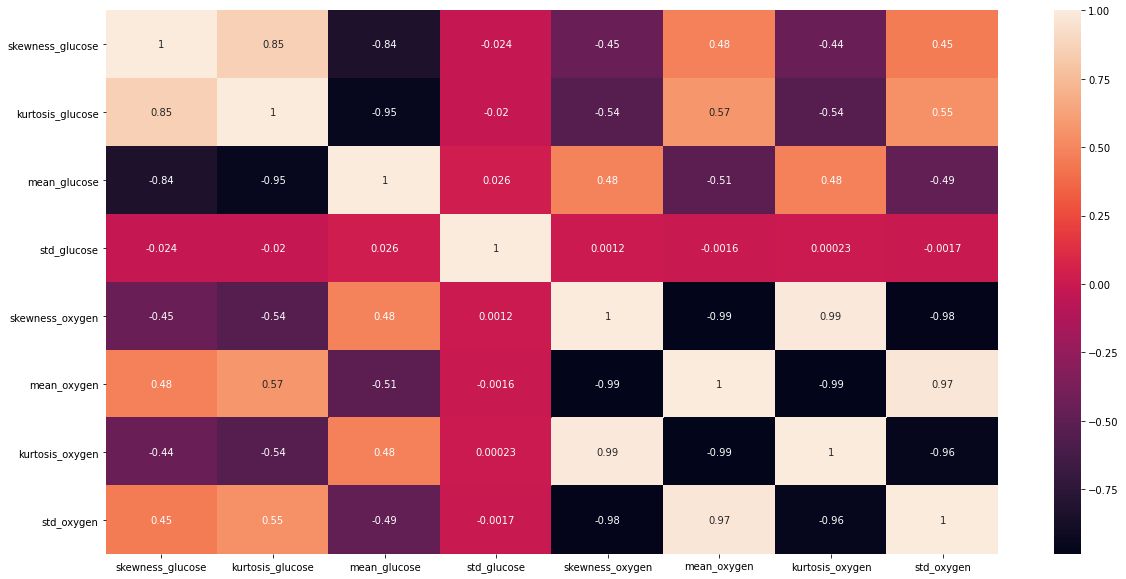

In [205]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_data.loc[:, ['skewness_glucose', 'kurtosis_glucose', 'mean_glucose', 'std_glucose', 'skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].corr(), ax=ax, annot=True)

Môžeme pozorovať významnú závislosť medzi atribútmi std_oxygen a skewness_oxygen, std_oxygen a kurtosis_oxygen, mean_oxygen a kurtosis_oxygen, mean_oxygen a skewness_oxygen. Oproti pôvodnému datasetu sú závislosti silnejšie.

Pomerne silnú koreláciu tiež vidíme medzi atribútmi mean_glucose a skewness_glucose a aj mean_glucose a kurtosis_glucose. Hodnoty týchto korelácií sú takmer totožné s pôvodným datasetom.

#### Spojitý - kategorický

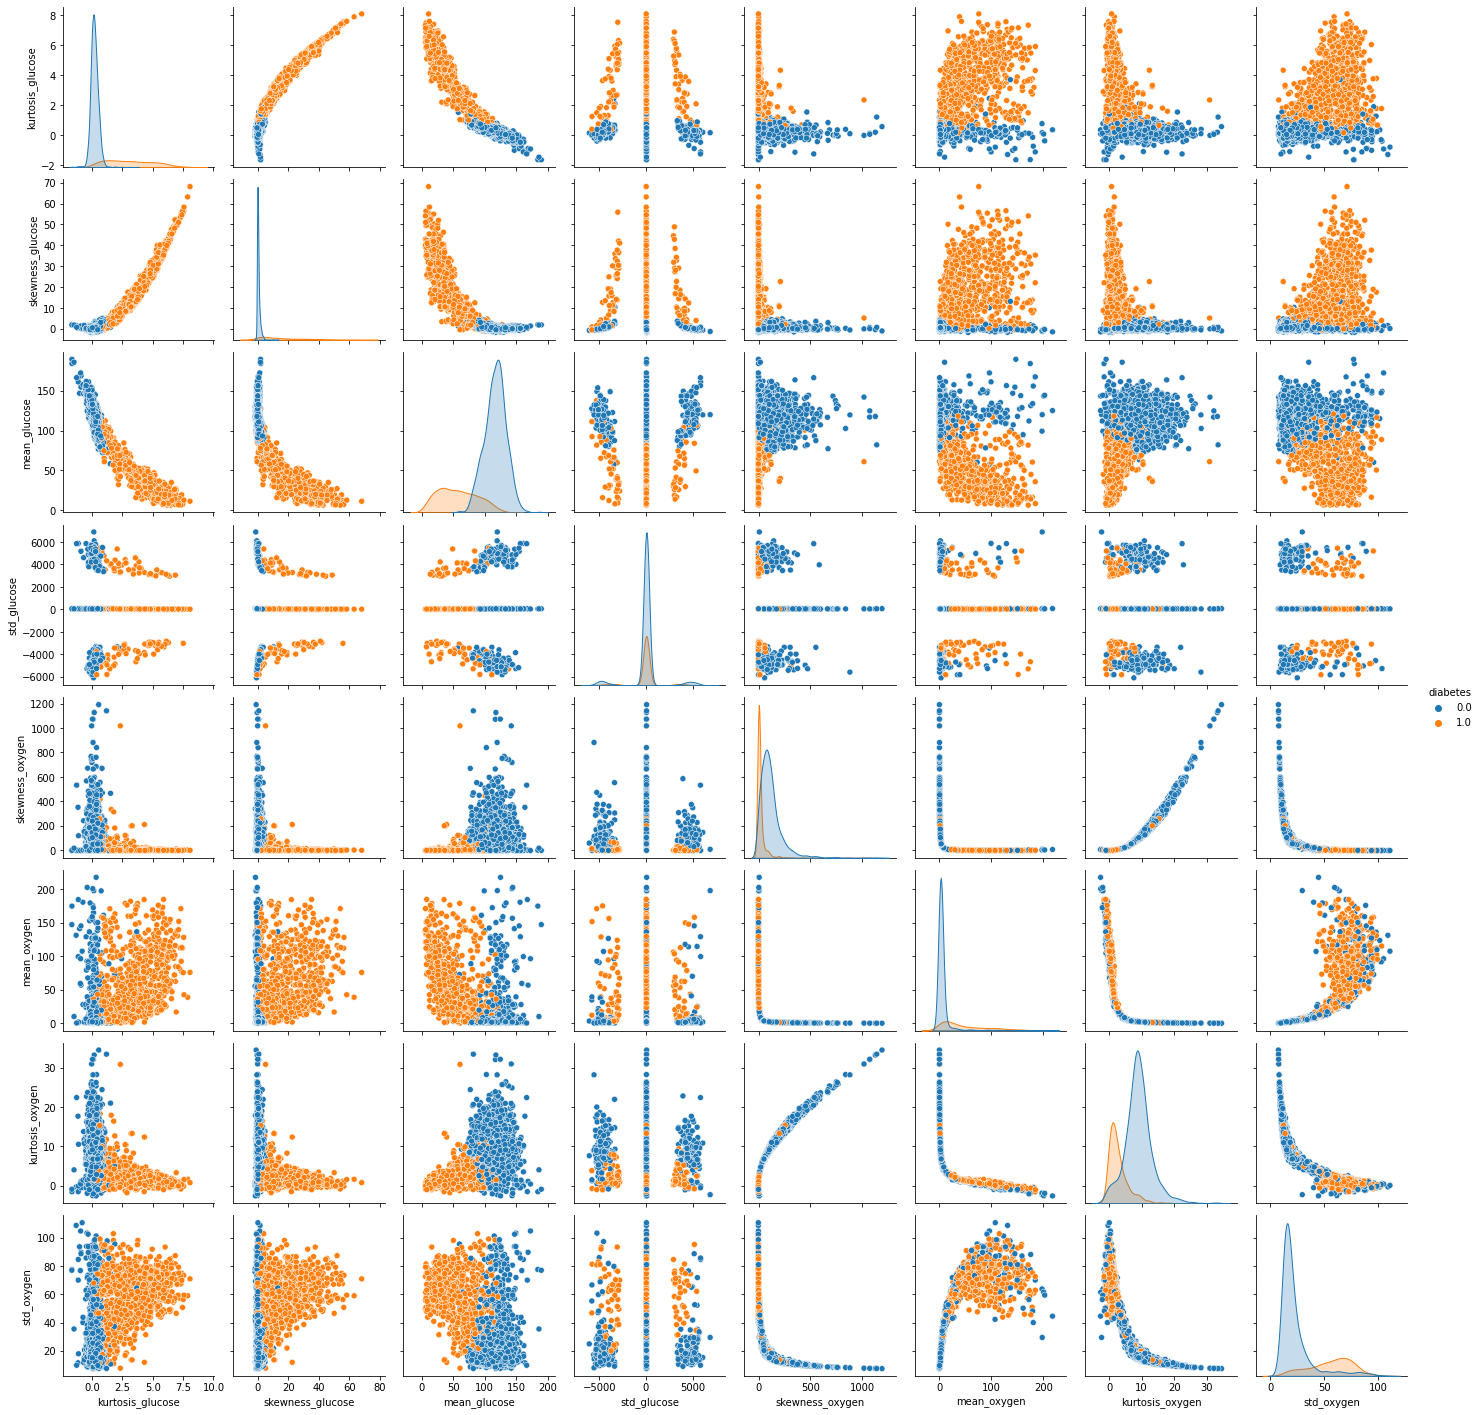

In [206]:
sns.pairplot(train_data_original, hue="diabetes", vars=['kurtosis_glucose', 'skewness_glucose',  'mean_glucose', 'std_glucose', 'skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen'])

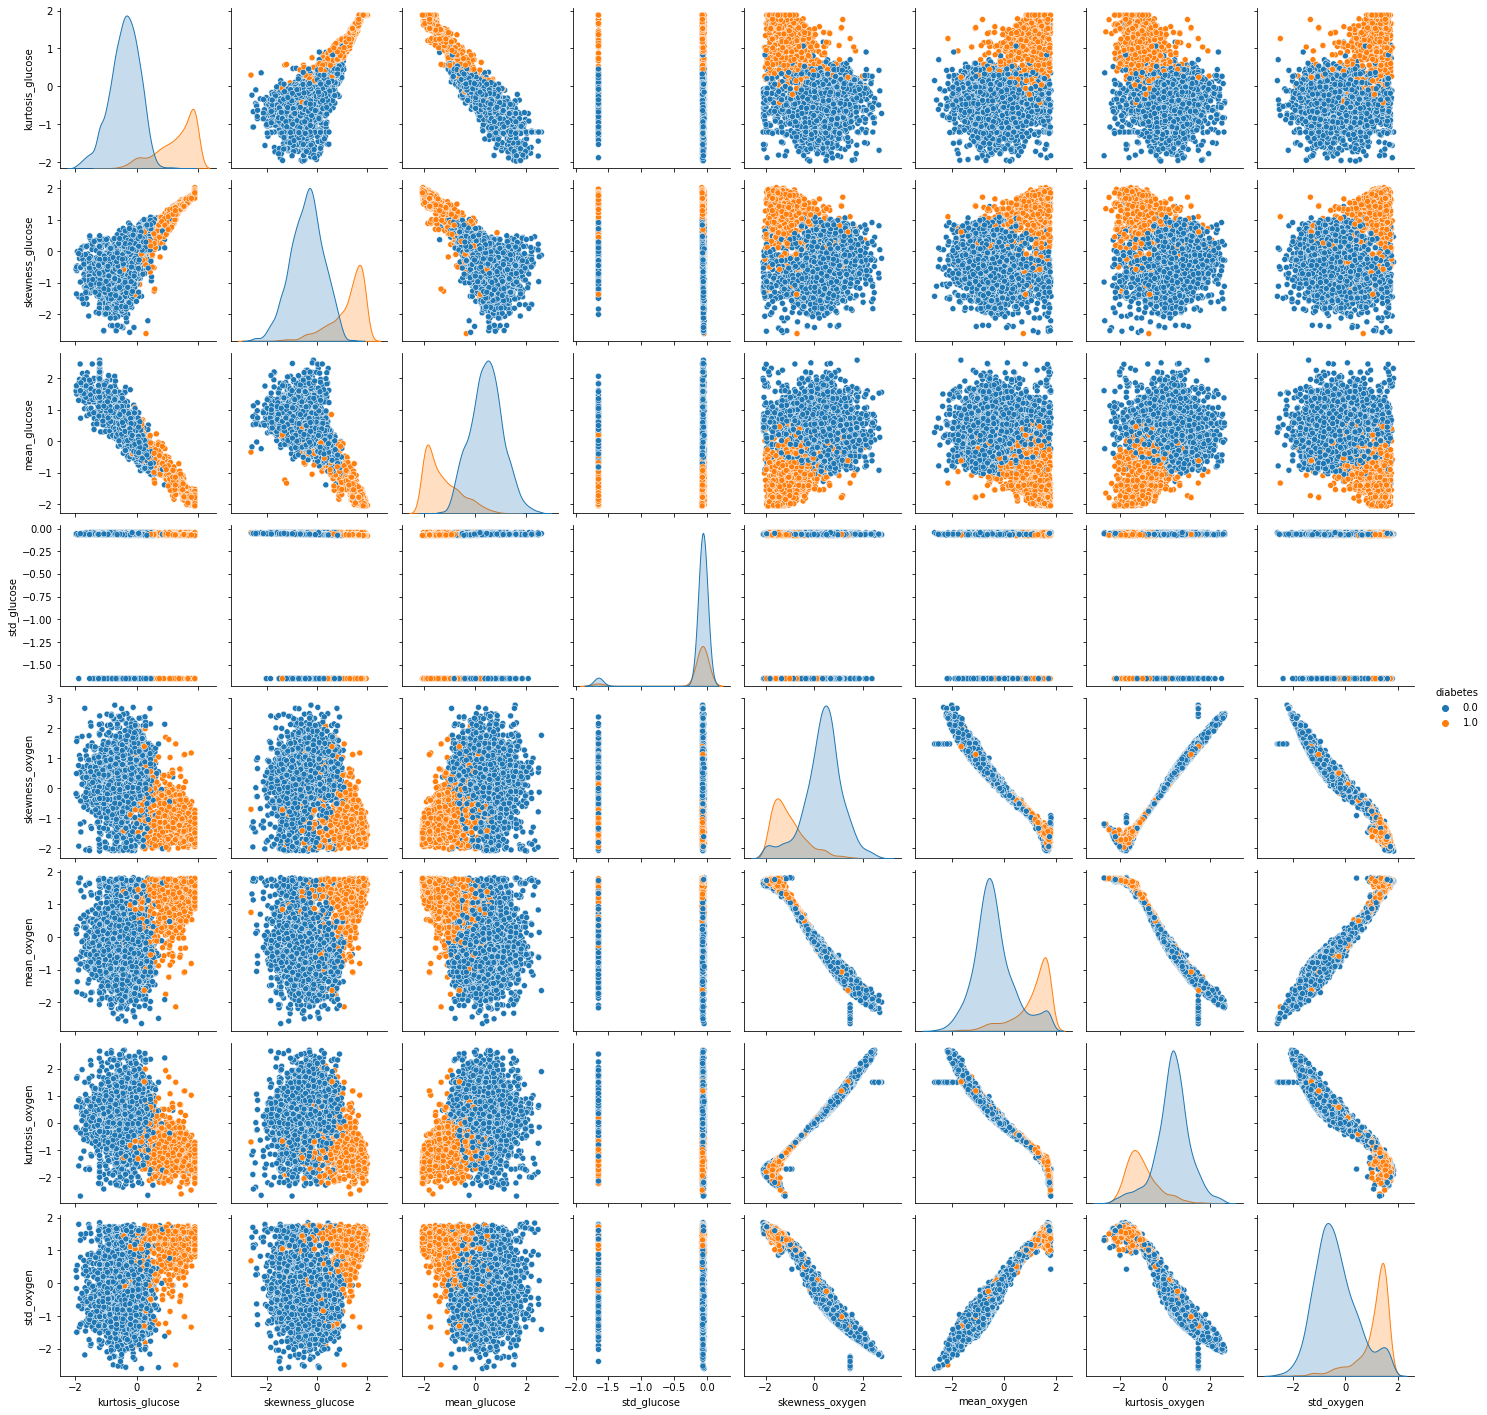

In [207]:
sns.pairplot(train_data, hue="diabetes", vars=['kurtosis_glucose', 'skewness_glucose',  'mean_glucose', 'std_glucose', 'skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen'])

Vidíme, že podobne ako v pôvodných dátach, pacienti s cukrovkou majú vyššiu hodnotu atribútov kurtosis_glucose a skewness_glucose a tiež, že majú nižšiu hodnotu mean_glucose.Tiež môžeme vidieť, že hodnoty atribútov pacientov s cukrovkou majú menší rozptyl a zdravých pacientov majú väčší rozptyl v porovnaní s neupravenými dátami.

#### Vizualizácia pomocou boxplotu a violinplotu

<AxesSubplot:xlabel='diabetes', ylabel='skewness_glucose'>

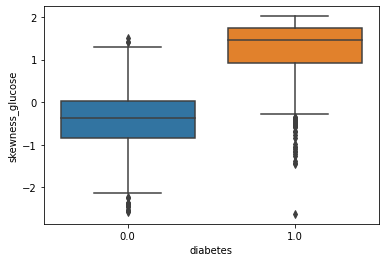

In [208]:
sns.boxplot(x='diabetes', y='skewness_glucose', data=train_data)

<AxesSubplot:xlabel='diabetes', ylabel='kurtosis_glucose'>

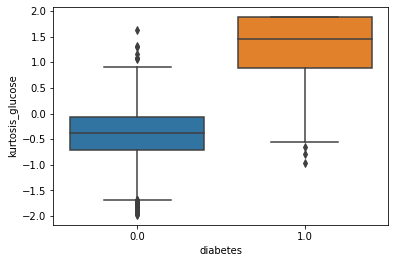

In [209]:
sns.boxplot(x='diabetes', y='kurtosis_glucose', data=train_data)

<AxesSubplot:xlabel='diabetes', ylabel='mean_glucose'>

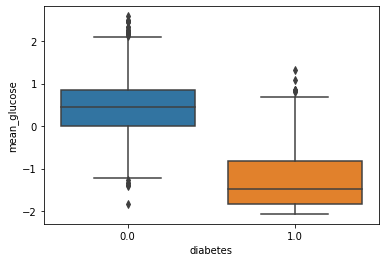

In [210]:
sns.boxplot(x='diabetes', y='mean_glucose', data=train_data)

<AxesSubplot:xlabel='diabetes', ylabel='skewness_glucose'>

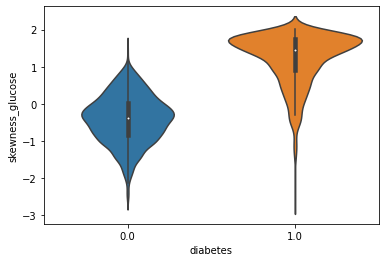

In [211]:
sns.violinplot(x='diabetes', y='skewness_glucose', data=train_data)

<AxesSubplot:xlabel='diabetes', ylabel='kurtosis_glucose'>

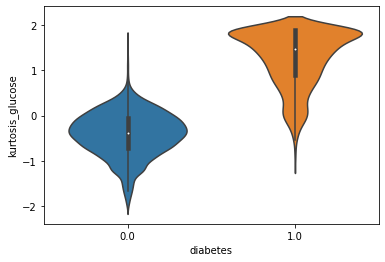

In [212]:
sns.violinplot(x='diabetes', y='kurtosis_glucose', data=train_data)

<AxesSubplot:xlabel='diabetes', ylabel='mean_glucose'>

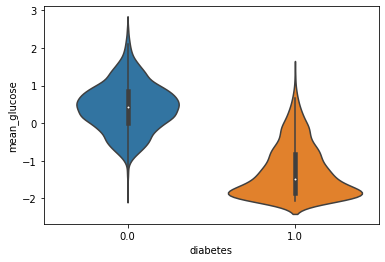

In [213]:
sns.violinplot(x='diabetes', y='mean_glucose', data=train_data)

Všetko čo sme vyčítali z pairplot-u sme si potvrdili na boxplotoch a violinplotoch. Na boxplotoch tiež vidíme, že rozdiely analyzovaných atribútov sú medzi zdravými a chorými pacientami výraznejšie, ako tomu bolo v neupravených dátach (pozri notebook s prieskumnou analýzou).

Ideme si tiež vizualizovať hodnoty veku u zdravých a chorých pacientov

<AxesSubplot:xlabel='diabetes', ylabel='age'>

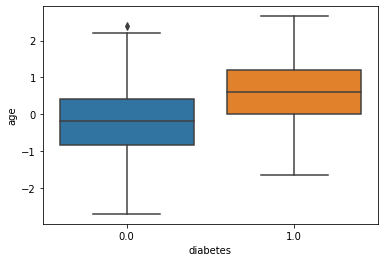

In [214]:
sns.boxplot(x='diabetes', y='age', data=train_data)

<AxesSubplot:xlabel='diabetes', ylabel='age'>

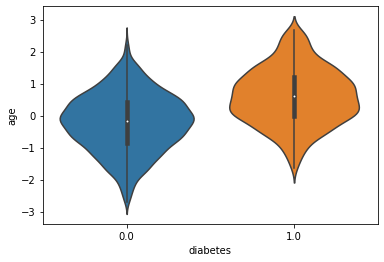

In [215]:
sns.violinplot(x='diabetes', y='age', data=train_data)

Rozdiel hodnôt veku medzi 2 skupinami pacientov je približne rovnaký ako v pôvodných dátach. Hodnoty veku majú tiež podobný rozptyl ako tomu bolo v predošlej fáze.

Na základe informácií získanej pri párovej analýze atribútov, nemeníme naše hypotézy z prvej fázy.